# Email Domain Classification - Cybersecurity Project

## Business Problem
Cyberattacks are a big threat to companies, and phishing emails are one of the most common ways hackers try to steal information. Attackers create fake or harmful email addresses to trick employees, steal data, or spread viruses. To protect against this, businesses need a system that can identify whether an email domain is safe, suspicious, or dangerous.

## Problem Statement
This project focuses on classifying email domains as secure or insecure based on various features. 
By using machine learning models, we aim to improve email security by identifying potentially unsafe domains.

## Dataset Description
- The dataset consists of various email domain features.
- Our target variable indicates whether the domain is secure or insecure.

## Objectives
1. Perform Exploratory Data Analysis (EDA) to understand patterns in the dataset.
2. Preprocess the data (handling missing values, encoding categorical variables, feature scaling).
3. Train multiple classification models and evaluate their performance.
4. Optimize the best-performing model and provide final recommendations.


# Classification - Classify email domains as secure or insecure. (Cybersecurity)

# import libraries

In [5]:
# Importing necessary libraries for data analysis, visualization, and machine learning
# lib for extraction, manipulation, analysis
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor


# train test split
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

#for encoding
from sklearn.preprocessing import StandardScaler,LabelEncoder

#LogisticRegression
from sklearn.linear_model import LogisticRegression, Lasso, Ridge

# Decision tree and RandonForest
from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.ensemble import RandomForestClassifier

# classification evaluation metrics
from sklearn.metrics import accuracy_score,classification_report,multilabel_confusion_matrix

# for AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

#for xgboost
from xgboost import XGBClassifier

# for SVM
from sklearn.svm import SVC

# for KNN
from sklearn.neighbors import KNeighborsClassifier

# for Naive Bayes
from sklearn.naive_bayes import BernoulliNB,MultinomialNB

# for PCA
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Loading the dataset from CSV file into a Pandas DataFrame

df = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\Neha assignments\ML Case studies\Email\emaildataset.csv')

In [7]:

df

,Email Content,Sender,Subject,Has Attachments,Attachment Type,URL Count,Has Suspicious Keywords,Email Length,Label
0,Adult hit artist hundred phone. Than husband f...,irobinson@yahoo.com,Despite college operation body agreement human...,False,.zip,2,False,31,1
1,Or test real ten score born. Subject work go r...,donnafuller@gmail.com,Prevent policy return toward summer capital.,True,.exe,1,False,28,1
2,Until car develop subject always special. Stuf...,thomasmendez@hotmail.com,Hour sell during worry both pick social.,False,.docx,0,True,25,0
3,Mention actually pattern possible main wait ge...,royjennifer@lopez.com,Magazine hotel safe national view score.,False,.docx,3,False,23,0
4,Friend forward half back.\nHerself single grow...,zgarcia@gmail.com,Debate Congress night quite right tell room few.,False,.pdf,0,True,23,0
...,...,...,...,...,...,...,...,...,...
995,Opportunity left public. Office figure remain ...,kimberly91@collins.com,Remain edge wait.,True,.exe,1,False,23,0
996,Most particular true not eye thought. Foreign ...,benjaminwilliams@yahoo.com,Policy against turn summer democratic worry rule.,True,.zip,3,False,21,1
997,Situation hospital practice six. Report return...,rburton@moreno.com,Huge spend low almost.,True,.pdf,0,True,23,0
998,Nation billion huge rather a blood. Word debat...,amber67@gmail.com,Put must fine camera on make could.,True,.zip,2,True,27,0


# EDA

In [9]:
# Checking dataset summary including column data types and missing values
# Code Explanation:
def eda(df):
    print("Shape : ",df.shape)
    print("__"*20)
    print("Size : ",df.size)
    print("__"*20)
    print("Info : \n",df.info())
    print("__"*20)
    print("Stats : \n",df.describe())
    print("__"*20)
    print("Data Types : \n",df.dtypes)
    print("__"*20)
    print("Checking for null values : \n",df.isnull().sum())
    print("__"*20)
    print("Checking duplicates in data : \n",df.duplicated().sum())
    print("__"*20)
eda(df)

Shape :  (1000, 9)
________________________________________
Size :  9000
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Email Content            1000 non-null   object
 1   Sender                   1000 non-null   object
 2   Subject                  1000 non-null   object
 3   Has Attachments          1000 non-null   bool  
 4   Attachment Type          816 non-null    object
 5   URL Count                1000 non-null   int64 
 6   Has Suspicious Keywords  1000 non-null   bool  
 7   Email Length             1000 non-null   int64 
 8   Label                    1000 non-null   int64 
dtypes: bool(2), int64(3), object(4)
memory usage: 56.8+ KB
Info : 
 None
________________________________________
Stats : 
          URL Count  Email Length        Label
count  1000.000000    1000.

In [10]:
# Dropping specific columns from the DataFrame
df = df.drop(columns=['Email Content', 'Sender', 'Subject'])

# Display the resulting DataFrame
df

,Has Attachments,Attachment Type,URL Count,Has Suspicious Keywords,Email Length,Label
0,False,.zip,2,False,31,1
1,True,.exe,1,False,28,1
2,False,.docx,0,True,25,0
3,False,.docx,3,False,23,0
4,False,.pdf,0,True,23,0
...,...,...,...,...,...,...
995,True,.exe,1,False,23,0
996,True,.zip,3,False,21,1
997,True,.pdf,0,True,23,0
998,True,.zip,2,True,27,0


In [11]:
# Analysis for numerical column
def stats(df,col):
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()
    var = df[col].var()
    std = df[col].std()
    skew = df[col].skew()
    Min = df[col].min()
    Max = df[col].max()
    Range = Max-Min

    print(f"Analysis of {col} column : \nmean_{col} : {mean}\nmedian_{col} : {median}\nmode_{col} : {mode}\nvarience_{col} : {var}\nStd_{col} : {std}\nSkewness_{col} : {skew}\nMin_{col} : {Min}\nMax_{col} : {Max}\nRange_{col} : {Range}\n")

In [12]:
# Processing and analyzing the dataset
for col in df.columns:
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
        print(f"Statistics for {col}:\n", stats(df, col))
    elif df[col].dtypes == 'bool':
        print(f"{col} is of boolean datatype")
        
    else:
        print(f"{col} is of Object datatype")
        print("____"*30)

Has Attachments is of boolean datatype
Attachment Type is of Object datatype
________________________________________________________________________________________________________________________
Analysis of URL Count column : 
mean_URL Count : 1.56
median_URL Count : 2.0
mode_URL Count : 0    3
Name: URL Count, dtype: int64
varience_URL Count : 1.2276276276276223
Std_URL Count : 1.107983586352985
Skewness_URL Count : -0.07224174572002064
Min_URL Count : 0
Max_URL Count : 3
Range_URL Count : 3

Statistics for URL Count:
 None
Has Suspicious Keywords is of boolean datatype
Analysis of Email Length column : 
mean_Email Length : 22.02
median_Email Length : 23.0
mode_Email Length : 0    27
Name: Email Length, dtype: int64
varience_Email Length : 29.362962962962943
Std_Email Length : 5.418760279156381
Skewness_Email Length : -0.39880534185503386
Min_Email Length : 7
Max_Email Length : 33
Range_Email Length : 26

Statistics for Email Length:
 None
Analysis of Label column : 
mean_Label : 0

In [90]:
#Function for Categorical Column Analysis
def categorical_column_analysis(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    print("Categorical Columns Analysis:")
    for col in categorical_columns:
        print(f"\n{col} - Value Counts:")
        print(df[col].value_counts())
# 3. Categorical Column Analysis
categorical_column_analysis(df)

Categorical Columns Analysis:

Attachment Type - Value Counts:
Attachment Type
.pdf     404
.docx    211
.zip     198
.exe     187
Name: count, dtype: int64


In [14]:
# Function to handle missing values in categorical columns
def handle_missing_values_categorical(df):
    # Select categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    # Impute missing values with the mode of each column
    df[categorical_columns] = df[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))
    
    print("\nMissing Values Handled for Categorical Columns (Imputed with Mode):")
    print(df.isnull().sum())
# Call the function on the DataFrame
handle_missing_values_categorical(df)


Missing Values Handled for Categorical Columns (Imputed with Mode):
Has Attachments            0
Attachment Type            0
URL Count                  0
Has Suspicious Keywords    0
Email Length               0
Label                      0
dtype: int64


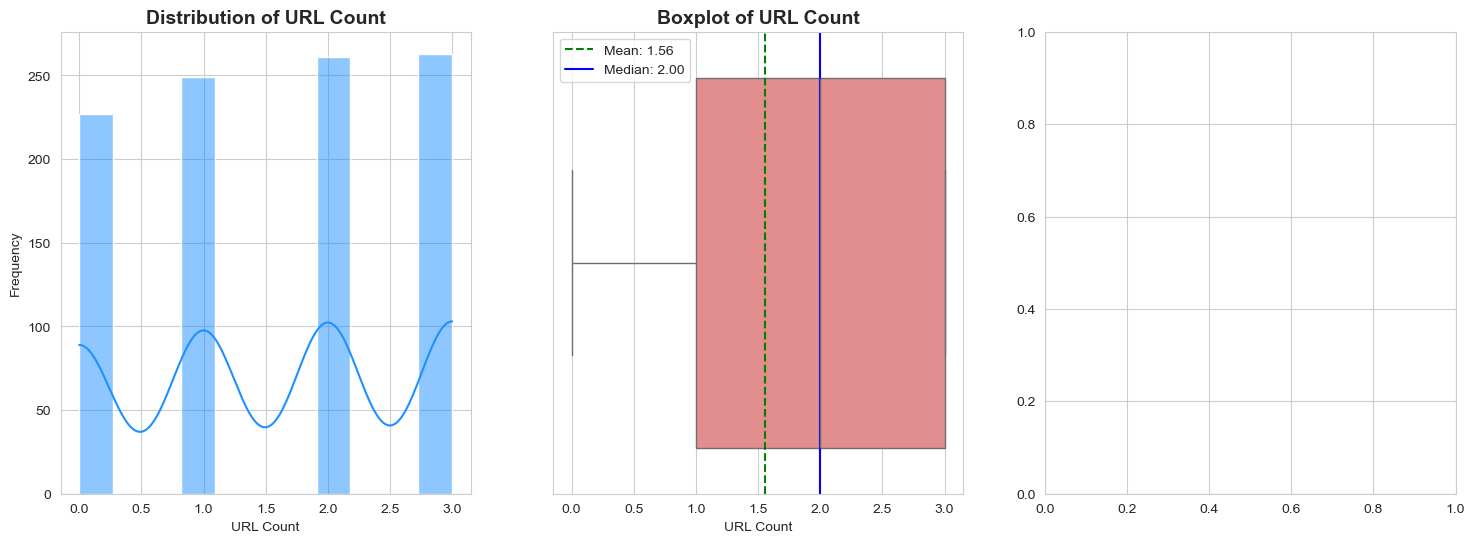

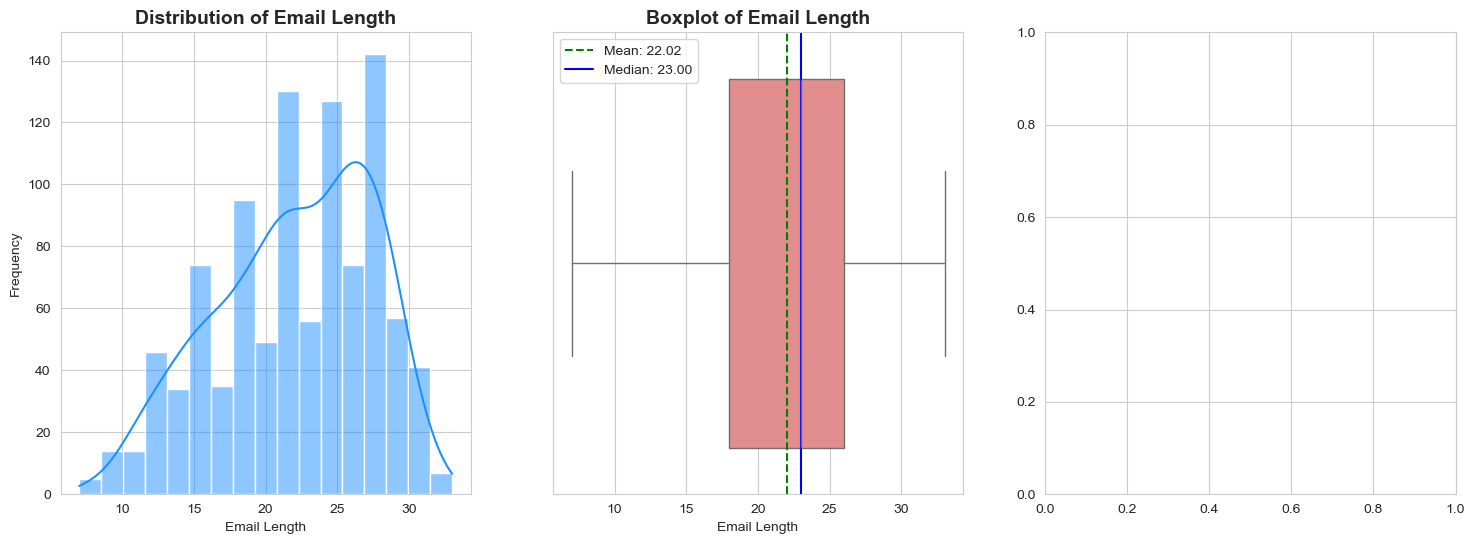

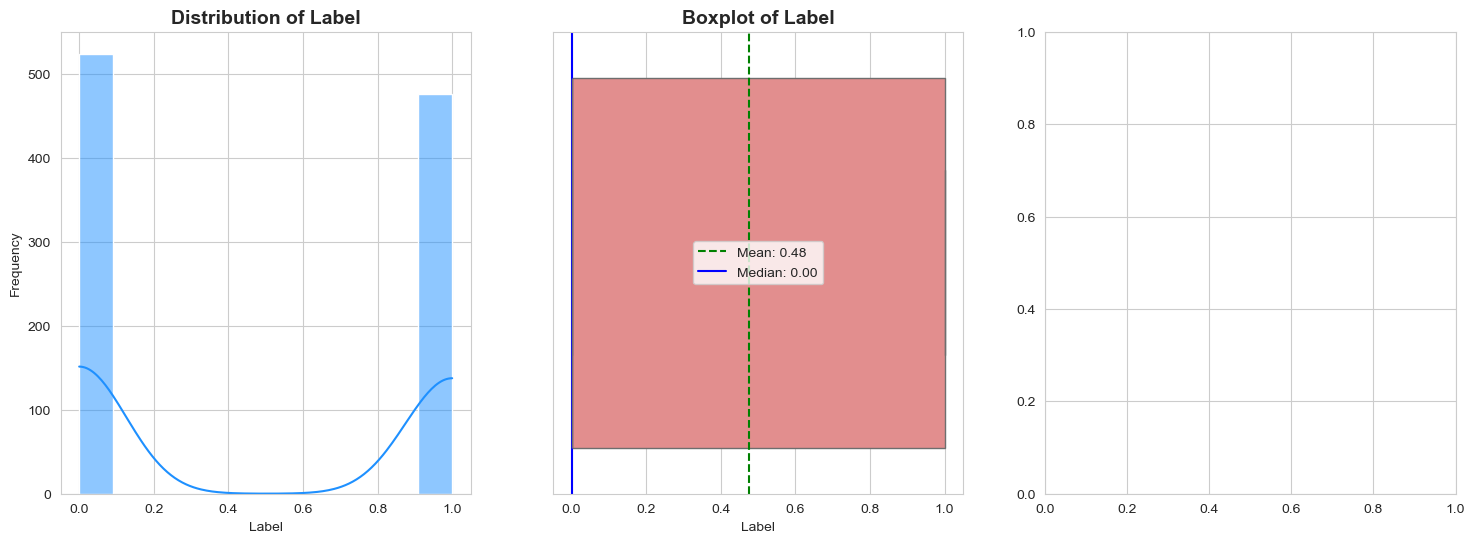

In [15]:
# Creating visualizations to explore data distribution and relationships
# Function for Univariate Analysis of Numerical Columns (Enhanced)
def univariate_analysis_numerical(df):
    sns.set_style("whitegrid")
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numerical_columns:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        # Histogram with KDE
        sns.histplot(df[col], kde=True, ax=axes[0], color='dodgerblue')
        axes[0].set_title(f"Distribution of {col}", fontsize=14, weight='bold')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Frequency")
        
        # Boxplot with annotations
        sns.boxplot(x=df[col], ax=axes[1], color='lightcoral')
        median = df[col].median()
        mean = df[col].mean()
        axes[1].axvline(mean, color='green', linestyle='--', label=f'Mean: {mean:.2f}')
        axes[1].axvline(median, color='blue', linestyle='-', label=f'Median: {median:.2f}')
        axes[1].legend()
        axes[1].set_title(f"Boxplot of {col}", fontsize=14, weight='bold')
        '''
        # Descriptive Statistics
        stats = df[col].describe().to_frame().T
        axes[2].axis('off')
        table = axes[2].table(cellText=stats.values, colLabels=stats.columns, cellLoc='center', loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.5, 1.5)
        axes[2].set_title(f"Descriptive Stats for {col}", fontsize=14, weight='bold')
        '''
        #plt.tight_layout()
        #plt.show()

# 5. Univariate Analysis of Numerical Columns
univariate_analysis_numerical(df)

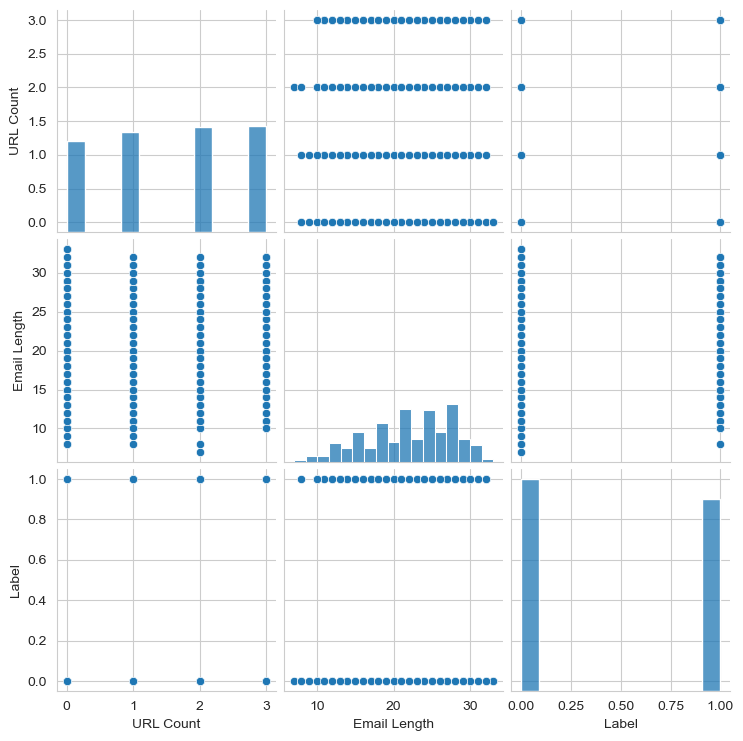

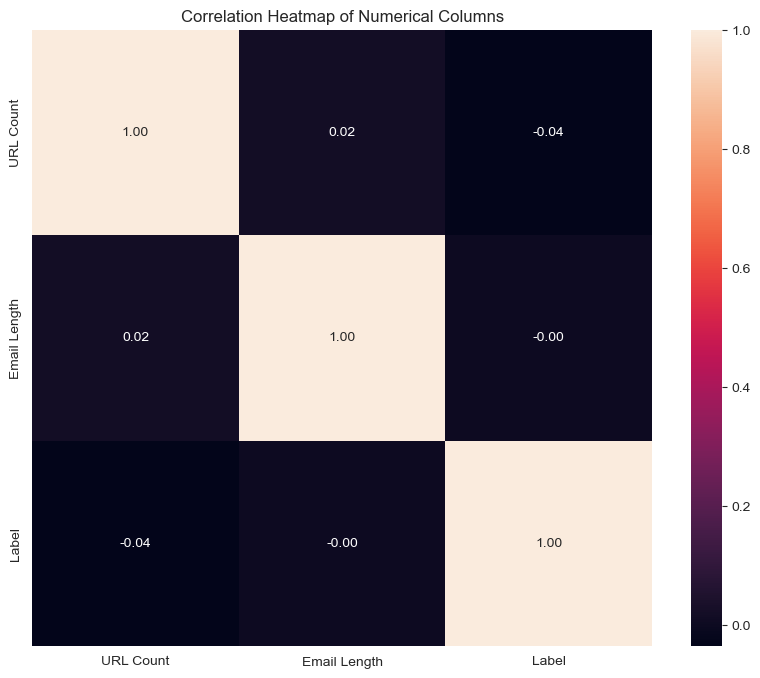

In [16]:
# Creating visualizations to explore data distribution and relationships
# Function to visualize numerical columns using multiple charts
def visualize_numerical_columns(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Pairplot to check correlations
    sns.pairplot(df[numerical_columns])
    plt.show()
    
    # Heatmap of correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numerical_columns].corr(), annot=True, fmt=".2f")
    plt.title("Correlation Heatmap of Numerical Columns")
    plt.show()

# 6. Visualize Numerical Columns
visualize_numerical_columns(df)


=== Visualizing 'URL Count' ===


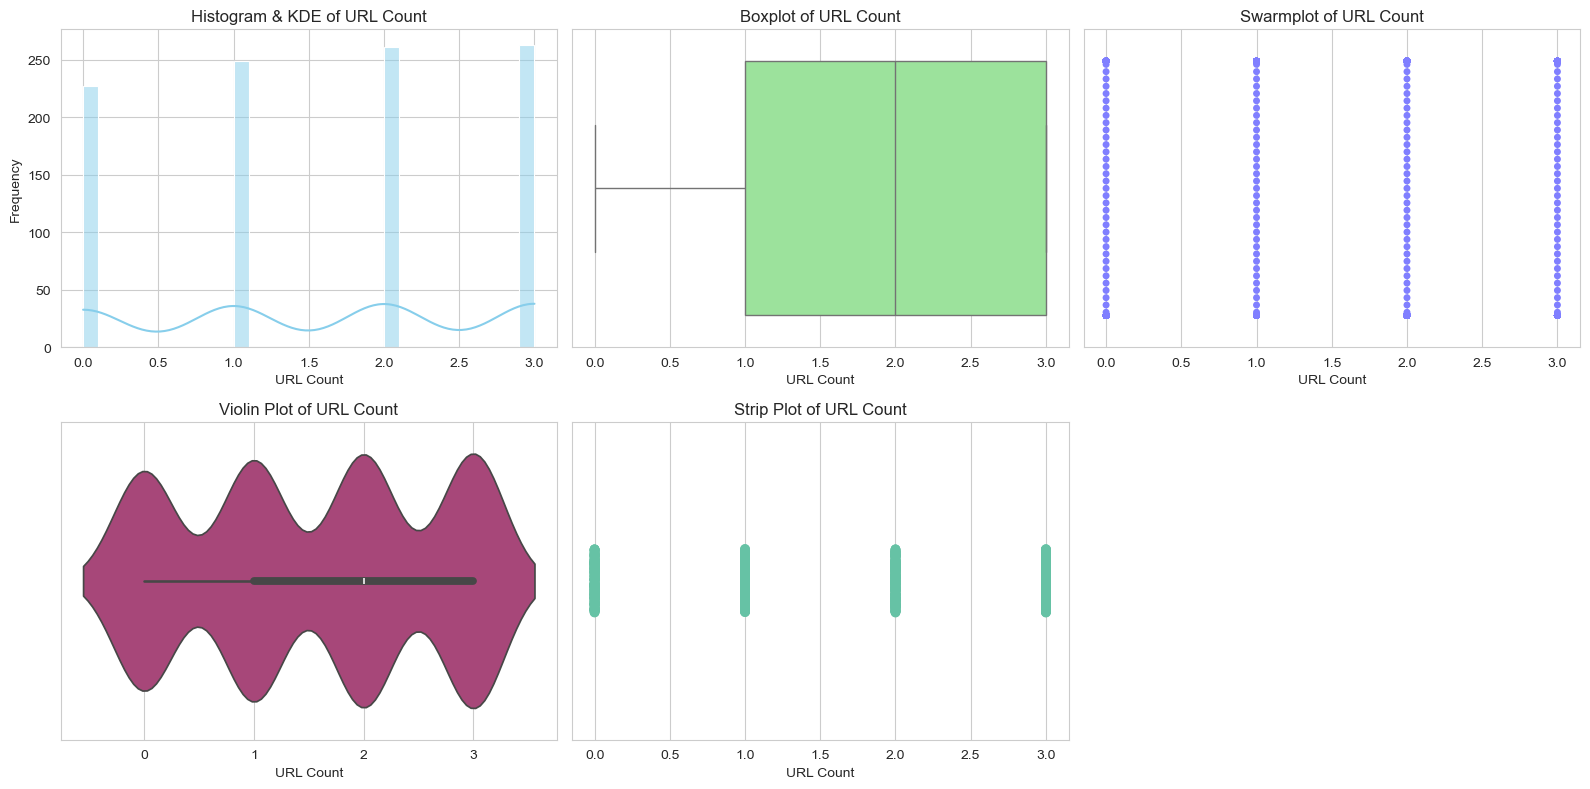


=== Visualizing 'Email Length' ===


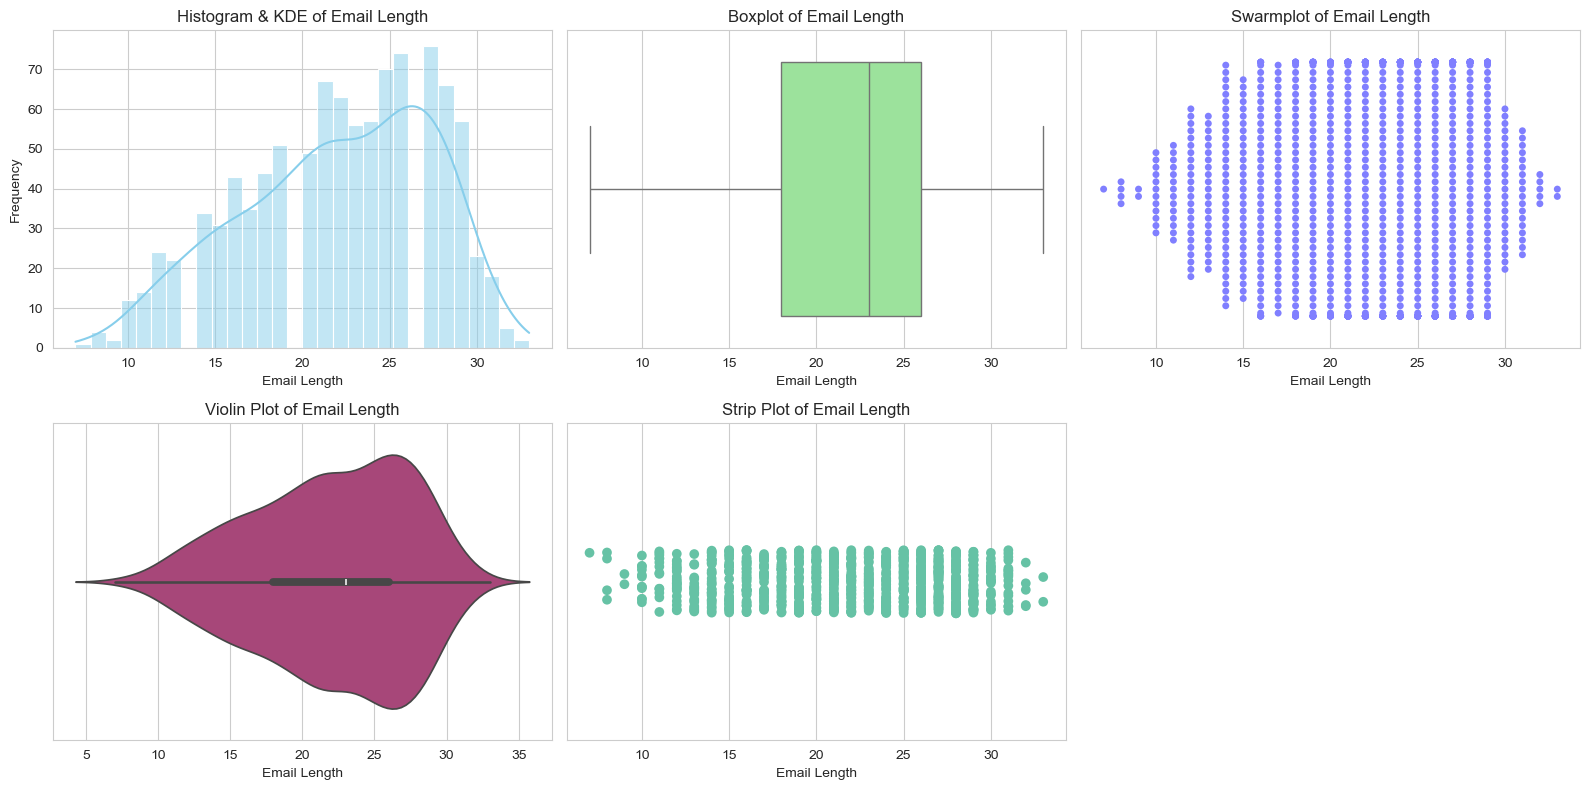


=== Visualizing 'Label' ===


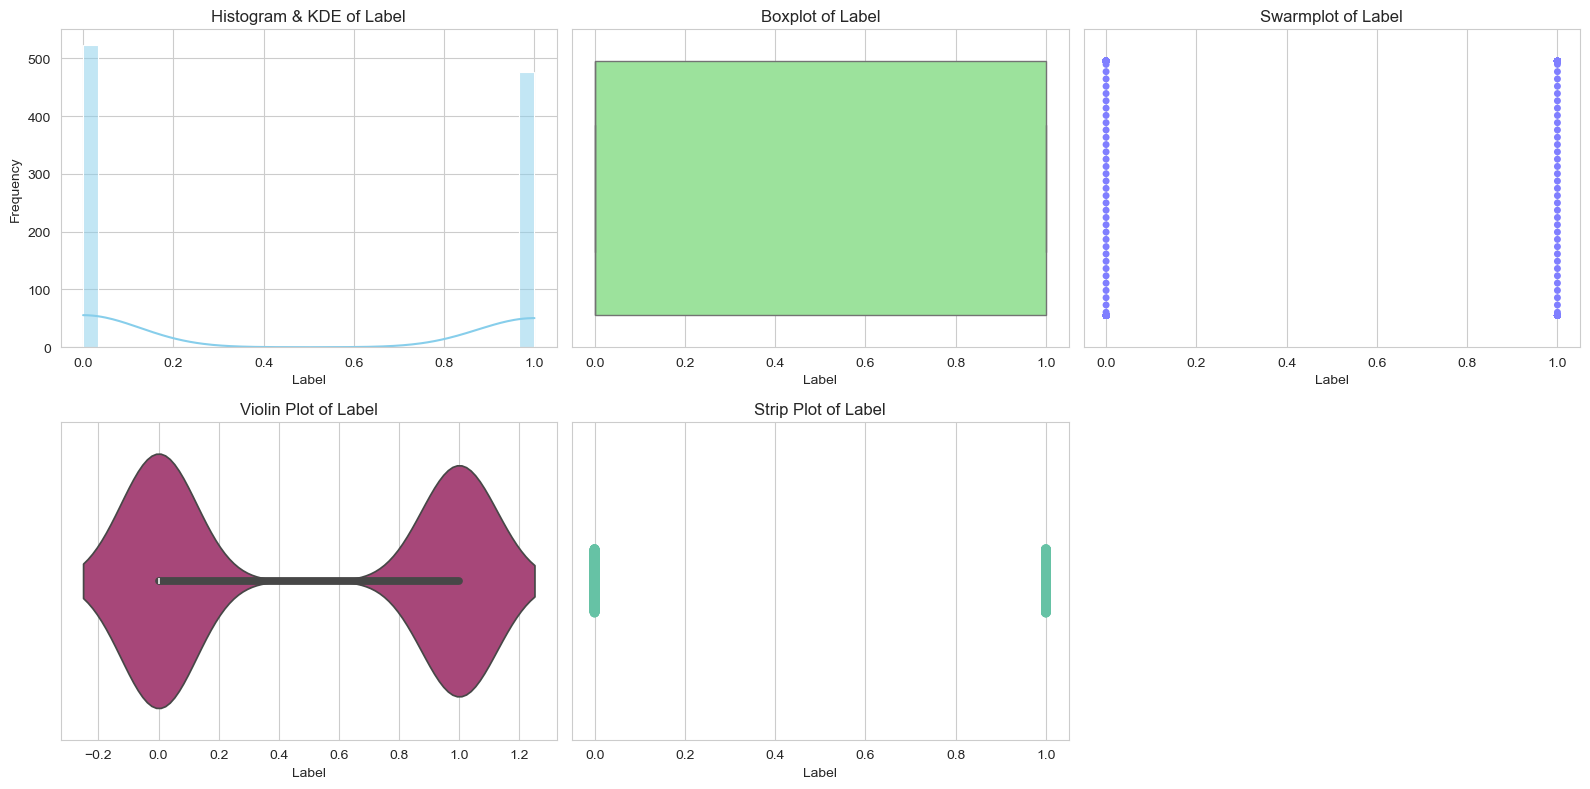

In [17]:
# Creating visualizations to explore data distribution and relationships
def visualize_numerical_columns(df):
    
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numerical_cols:
        print(f"\n=== Visualizing '{col}' ===")
        
        # Set the figure size and style
        plt.figure(figsize=(16, 8))
        sns.set_style('whitegrid')
        
        # 1. Histogram with KDE
        plt.subplot(2, 3, 1)
        sns.histplot(df[col], kde=True, color='skyblue', bins=30)
        plt.title(f'Histogram & KDE of {col}', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
        # 2. Boxplot
        plt.subplot(2, 3, 2)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Boxplot of {col}', fontsize=12)
        plt.xlabel(col)
        
        # 3. Swarmplot
        plt.subplot(2, 3, 3)
        sns.swarmplot(x=df[col], palette='cool')
        plt.title(f'Swarmplot of {col}', fontsize=12)
        plt.xlabel(col)
        
        # 4. Violin plot
        plt.subplot(2, 3, 4)
        sns.violinplot(x=df[col], palette='magma')
        plt.title(f'Violin Plot of {col}', fontsize=12)
        plt.xlabel(col)
        
        # 5. Strip plot
        plt.subplot(2, 3, 5)
        sns.stripplot(x=df[col], jitter=True, size=7, palette='Set2')
        plt.title(f'Strip Plot of {col}', fontsize=12)
        plt.xlabel(col)
        
        # Adjust layout
        plt.tight_layout()
        plt.show()
visualize_numerical_columns(df)


=== Visualizing 'Attachment Type' ===


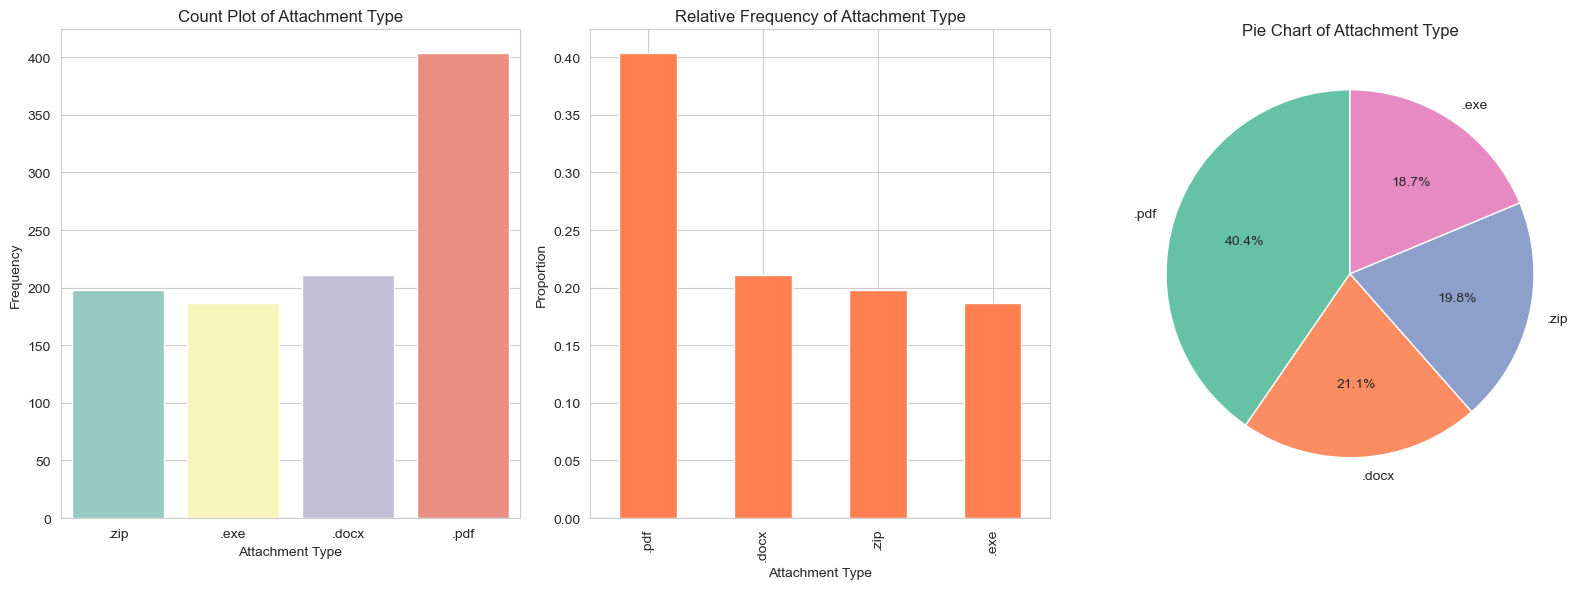

In [18]:
# Creating visualizations to explore data distribution and relationships
# Visualizes categorical columns using multiple charts 
def visualize_categorical_columns(df,col):    
    #categorical_cols = df.select_dtypes(include=['object']).columns
    
    #for col in df:
    print(f"\n=== Visualizing '{col}' ===")
        
    # Set the figure size and style
    plt.figure(figsize=(16, 6))
    sns.set_style('whitegrid')
        
    # 1. Count Plot
    plt.subplot(1, 3, 1)
    sns.countplot(x=df[col], palette='Set3')
    plt.title(f'Count Plot of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
        
    # 2. Bar Plot (Relative Frequency)
    plt.subplot(1, 3, 2)
    freq = df[col].value_counts(normalize=True)
    freq.plot(kind='bar', color='coral')
    plt.title(f'Relative Frequency of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Proportion')
        
    # 3. Pie Chart
    plt.subplot(1, 3, 3)
    freq.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90)
    plt.title(f'Pie Chart of {col}', fontsize=12)
    plt.ylabel('')  # Hide y-axis label
        
    # Adjust layout
    plt.tight_layout()
    plt.show()
visualize_categorical_columns(df,'Attachment Type')

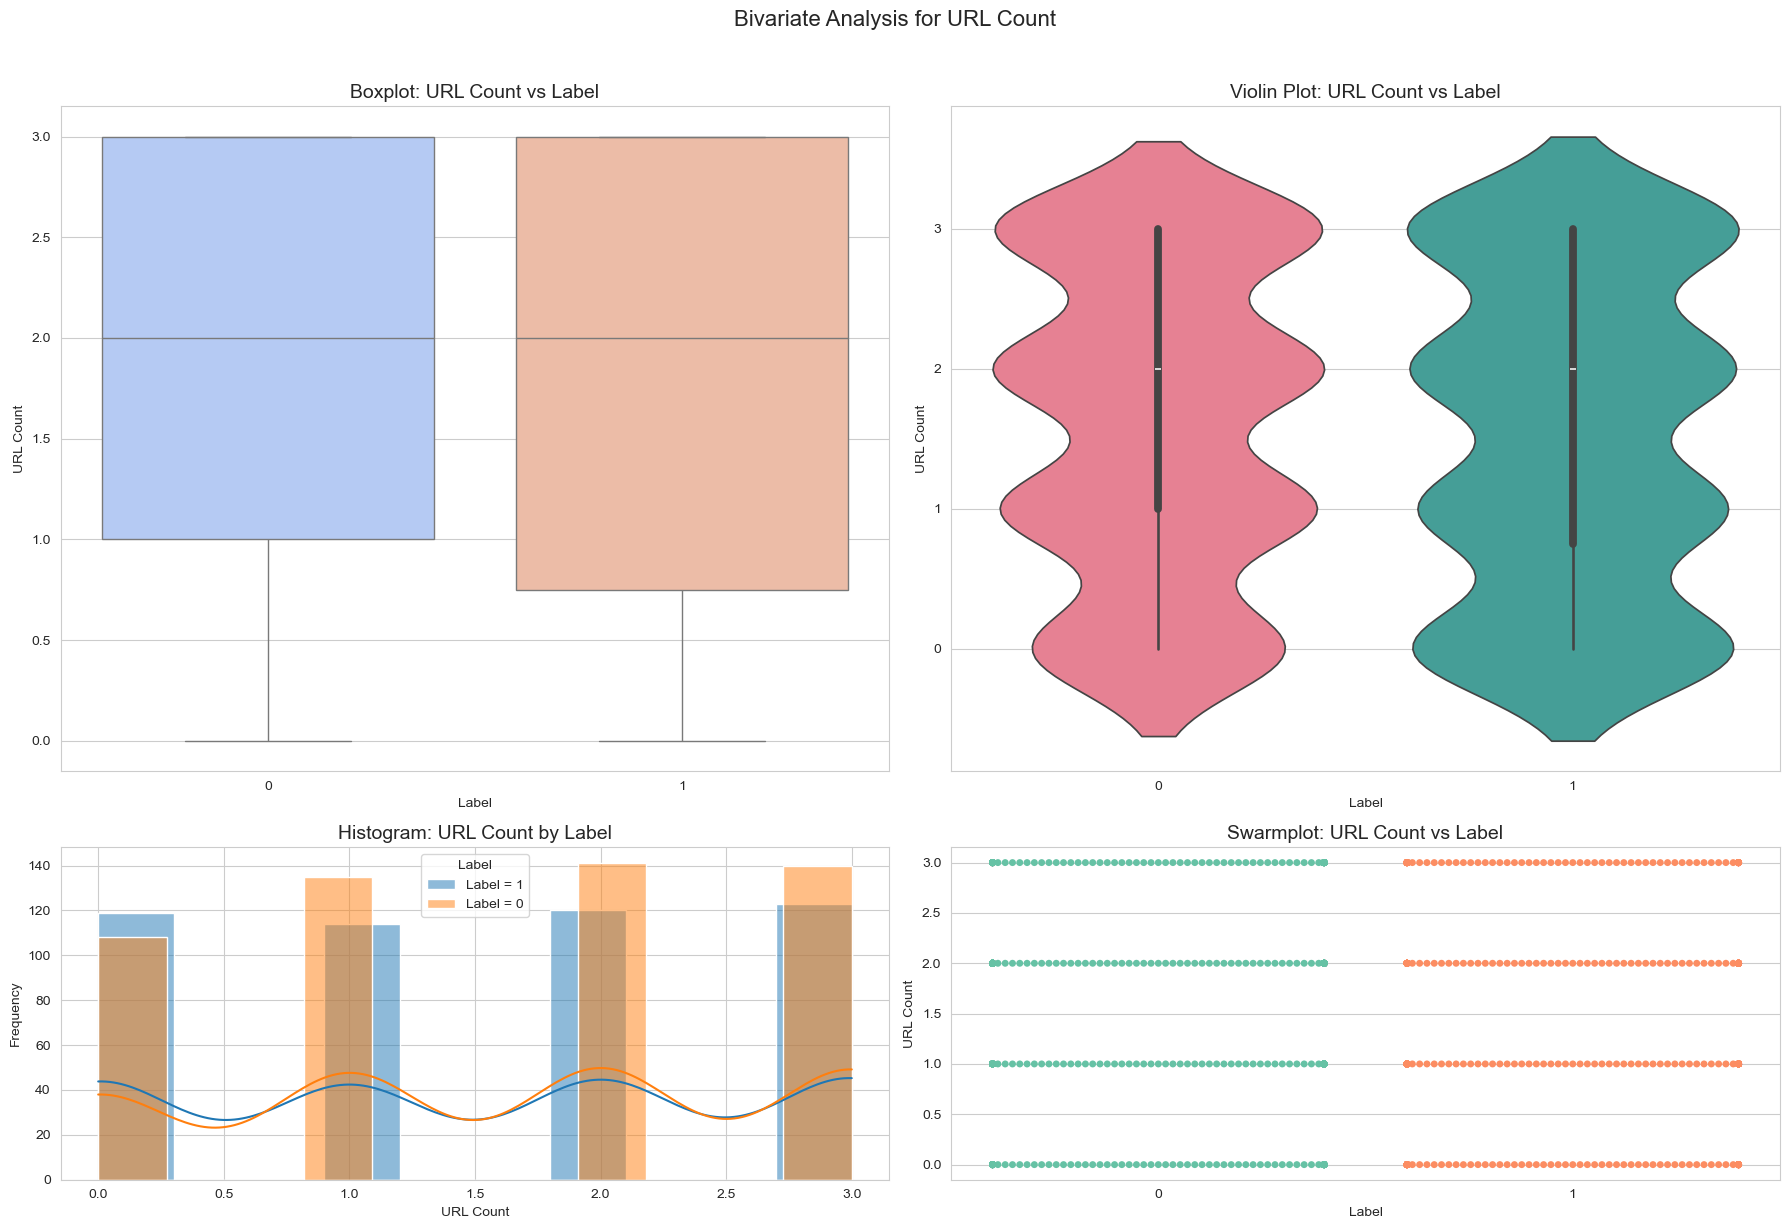

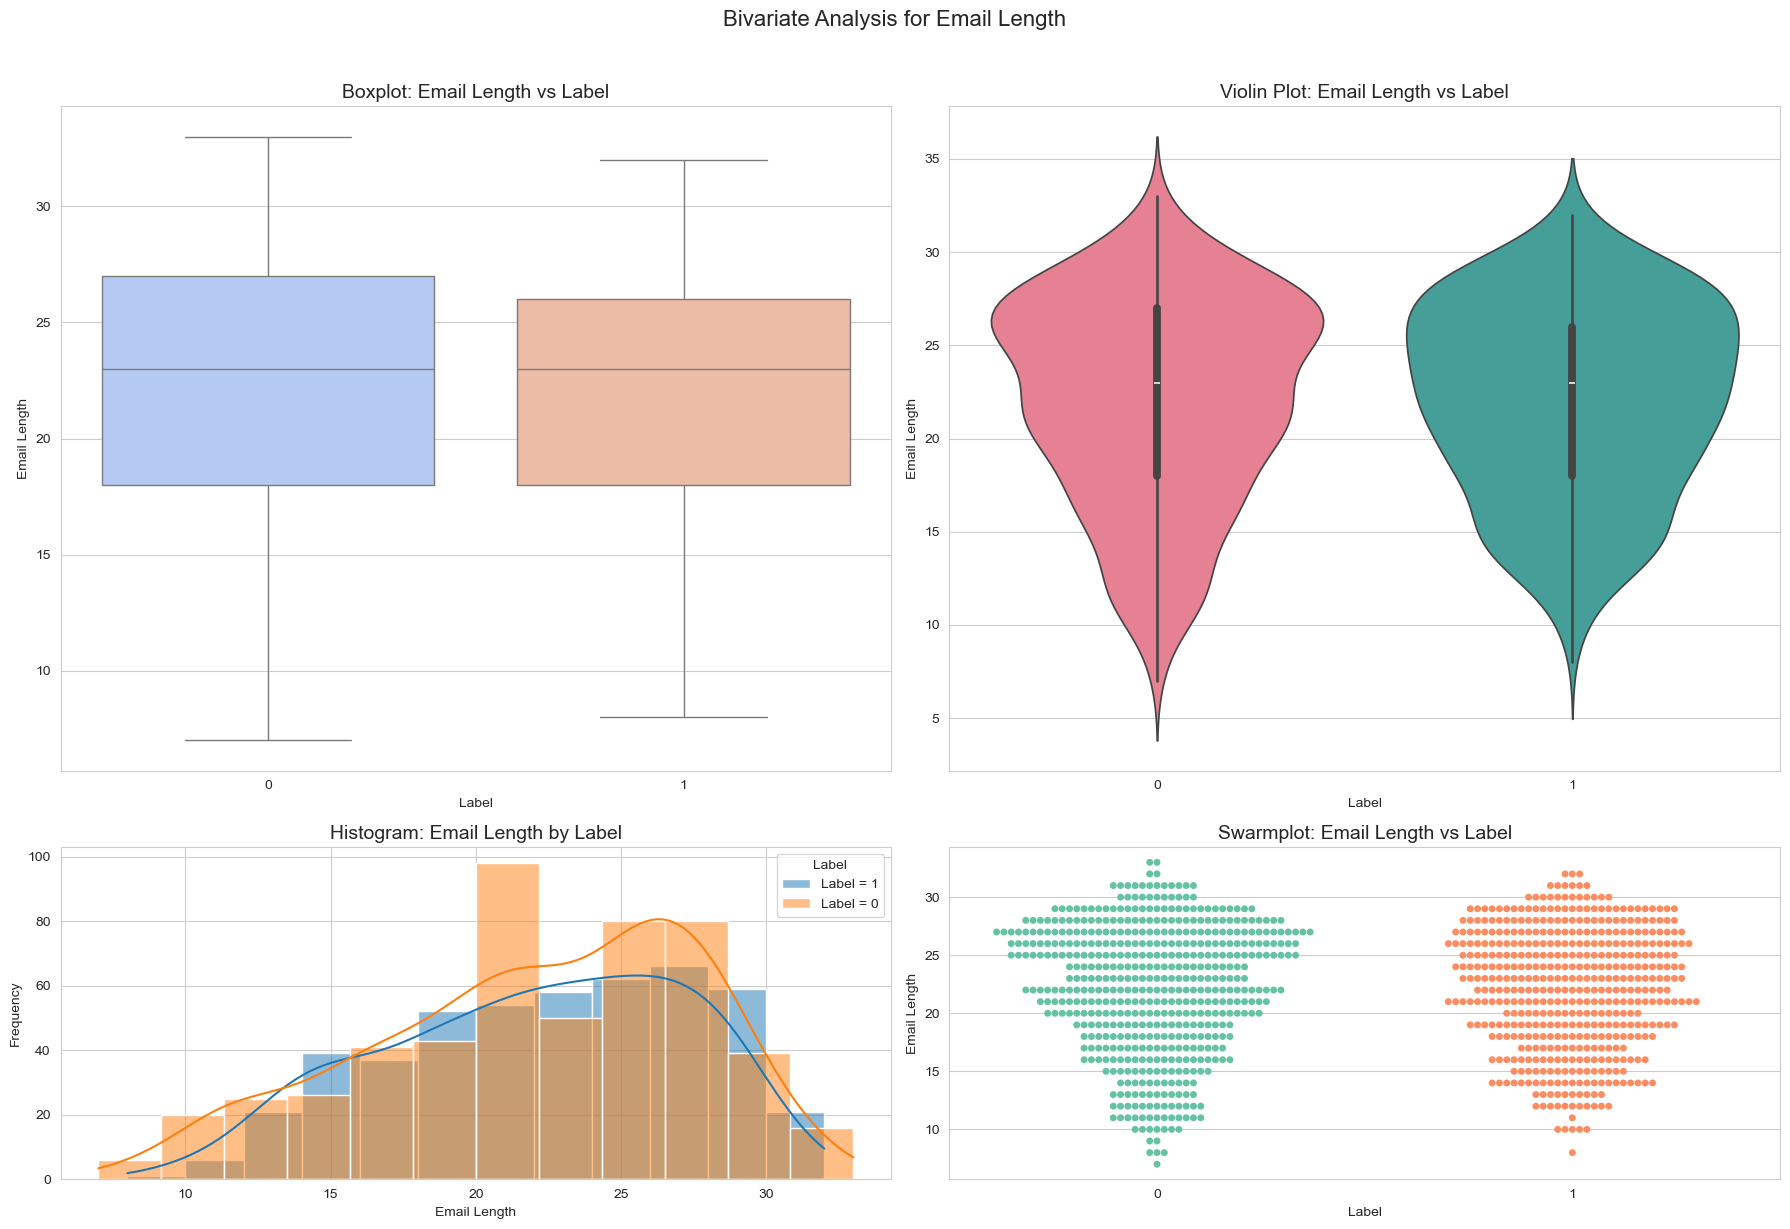

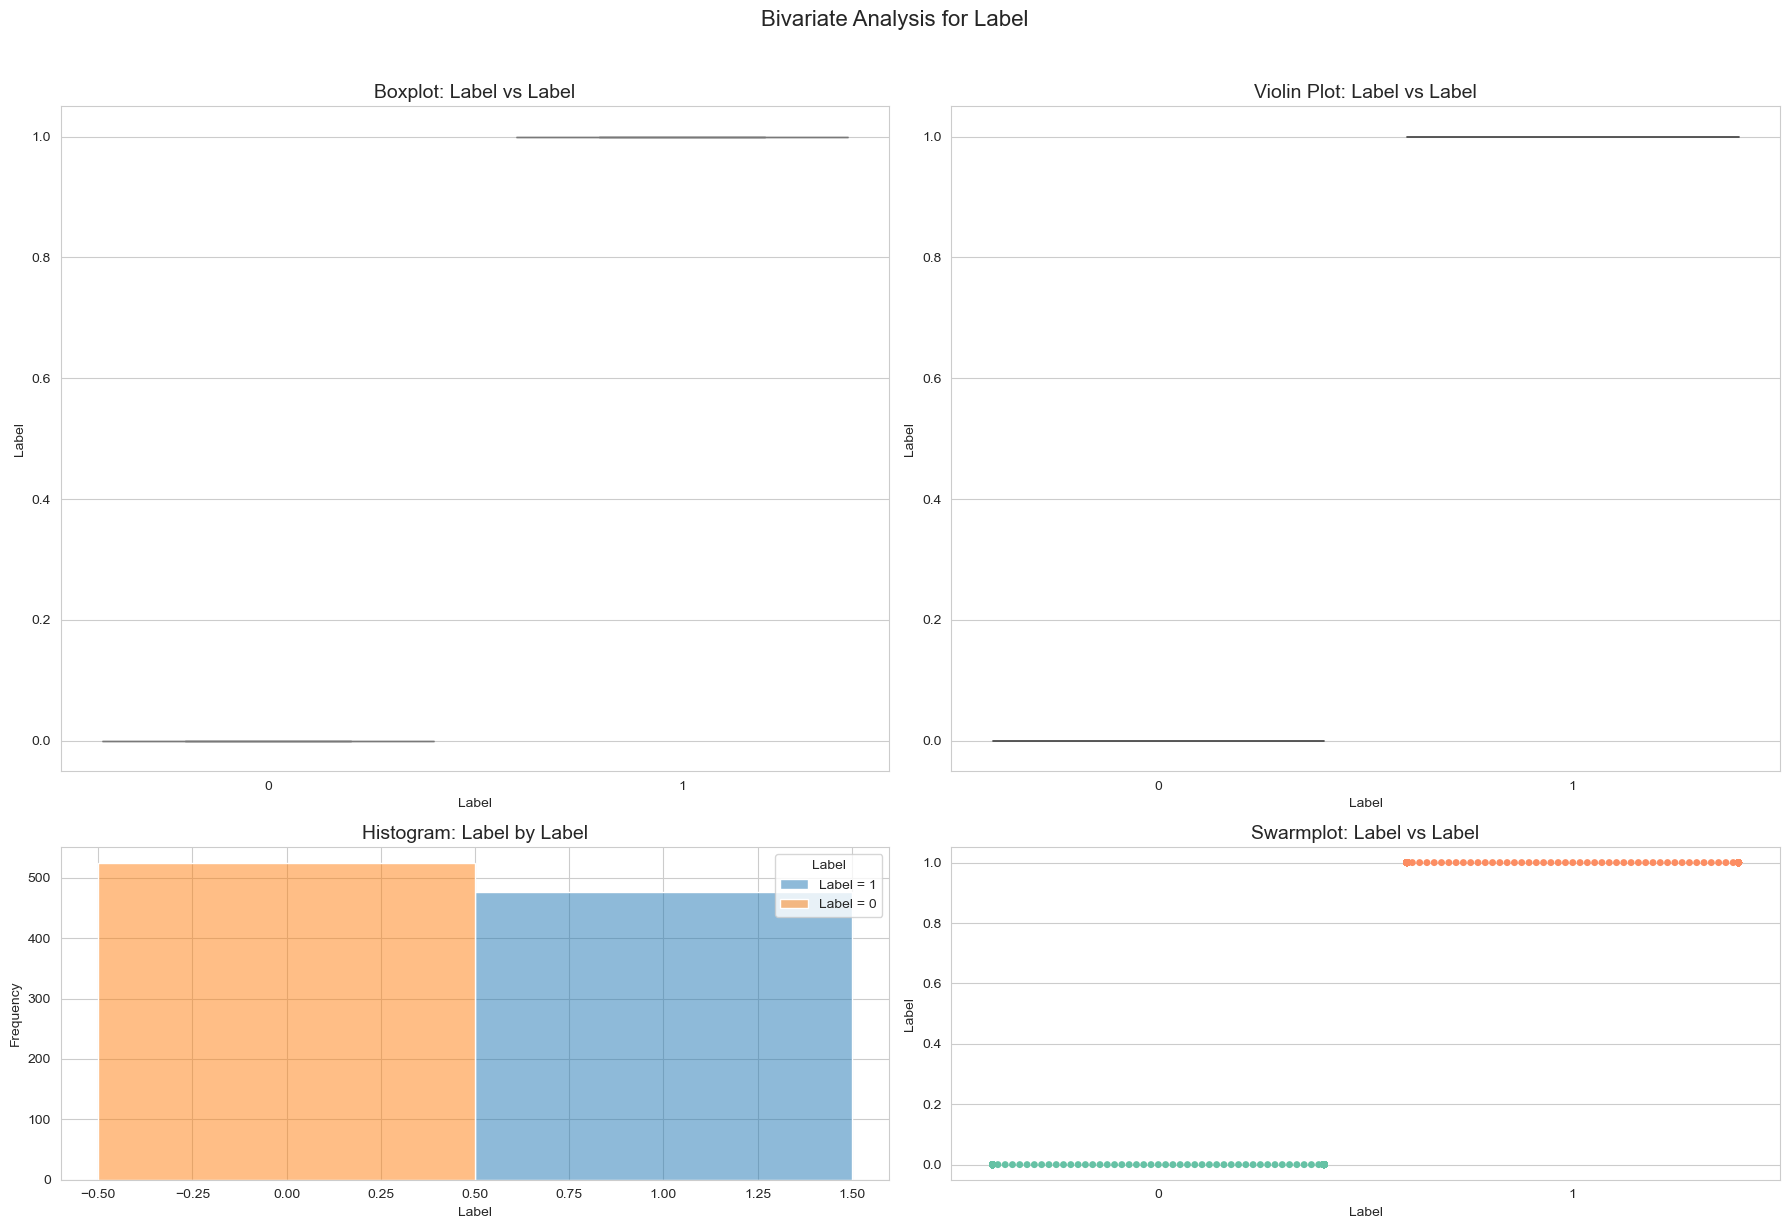

KeyError: "None of [Index(['URL CountLabel', 'Email LengthLabel', 'LabelLabel'], dtype='object')] are in the [columns]"

In [84]:
# Creating visualizations to explore data distribution and relationships
# Function for Bivariate Analysis with multiple charts (Boxplot, Violin, Swarm, Heatmap, Histogram)
def bivariate_analysis(df, target_column):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numerical_columns:
        fig, axes = plt.subplots(2, 2, figsize=(18, 12), gridspec_kw={'height_ratios': [2, 1]})
        
        # Boxplot
        sns.boxplot(x=df[target_column], y=df[col], ax=axes[0, 0], palette='coolwarm')
        axes[0, 0].set_title(f"Boxplot: {col} vs {target_column}", fontsize=14)
        axes[0, 0].set_xlabel(target_column)
        axes[0, 0].set_ylabel(col)
        
        # Violin plot
        sns.violinplot(x=df[target_column], y=df[col], ax=axes[0, 1], palette='husl')
        axes[0, 1].set_title(f"Violin Plot: {col} vs {target_column}", fontsize=14)
        axes[0, 1].set_xlabel(target_column)
        axes[0, 1].set_ylabel(col)
        
        # Histogram
        for value in df[target_column].unique():
            sns.histplot(df[df[target_column] == value][col], kde=True, label=f"{target_column} = {value}", ax=axes[1, 0])
        axes[1, 0].set_title(f"Histogram: {col} by {target_column}", fontsize=14)
        axes[1, 0].set_xlabel(col)
        axes[1, 0].set_ylabel("Frequency")
        axes[1, 0].legend(title=target_column)
        
        # Swarmplot (if number of unique values in target column is manageable)
        if df[target_column].nunique() <= 10:  # Avoid overcrowding in swarmplot
            sns.swarmplot(x=df[target_column], y=df[col], ax=axes[1, 1], palette='Set2', size=5)
            axes[1, 1].set_title(f"Swarmplot: {col} vs {target_column}", fontsize=14)
            axes[1, 1].set_xlabel(target_column)
            axes[1, 1].set_ylabel(col)
        
        plt.suptitle(f"Bivariate Analysis for {col}", fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()
    
    # Heatmap for correlation with target variable (if target is numeric)
    if pd.api.types.is_numeric_dtype(df[target_column]):
        correlation = df[numerical_columns + [target_column]].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title("Correlation Heatmap", fontsize=16)
        plt.show()

bivariate_analysis(df, target_column='Label')

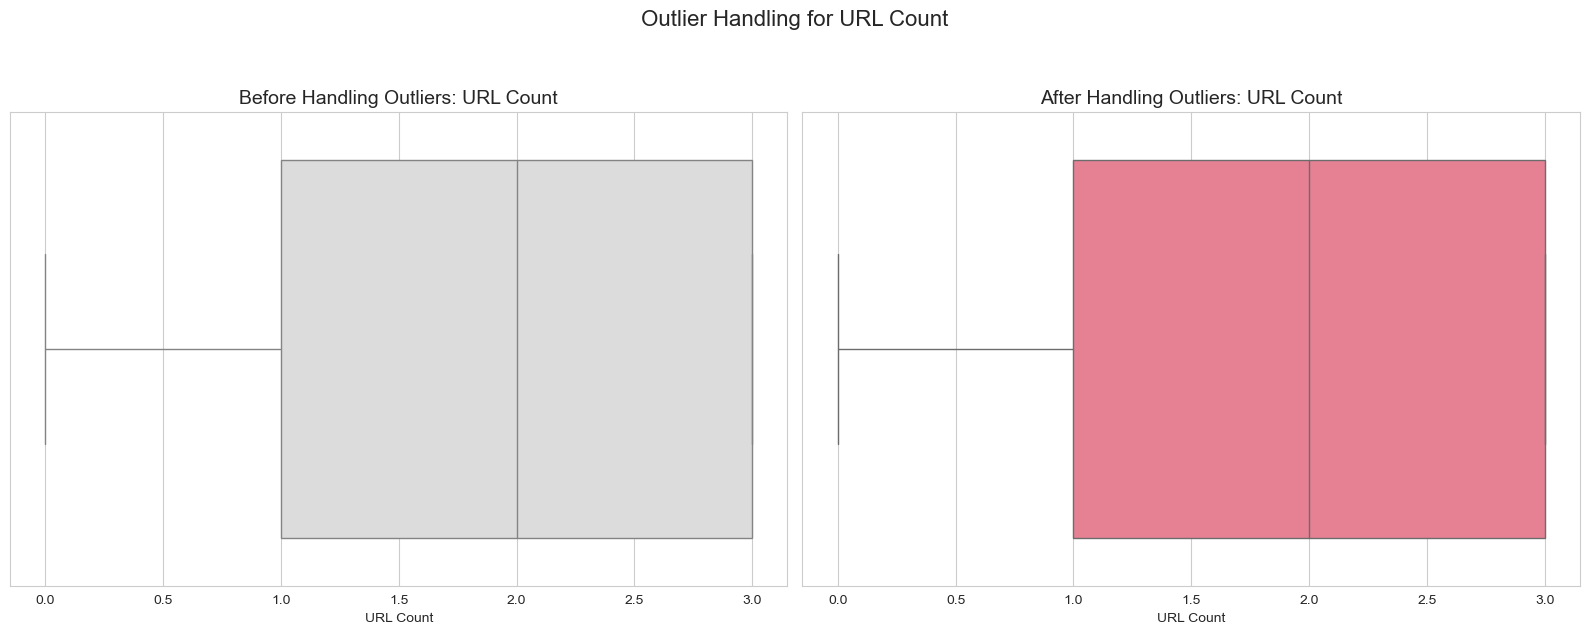

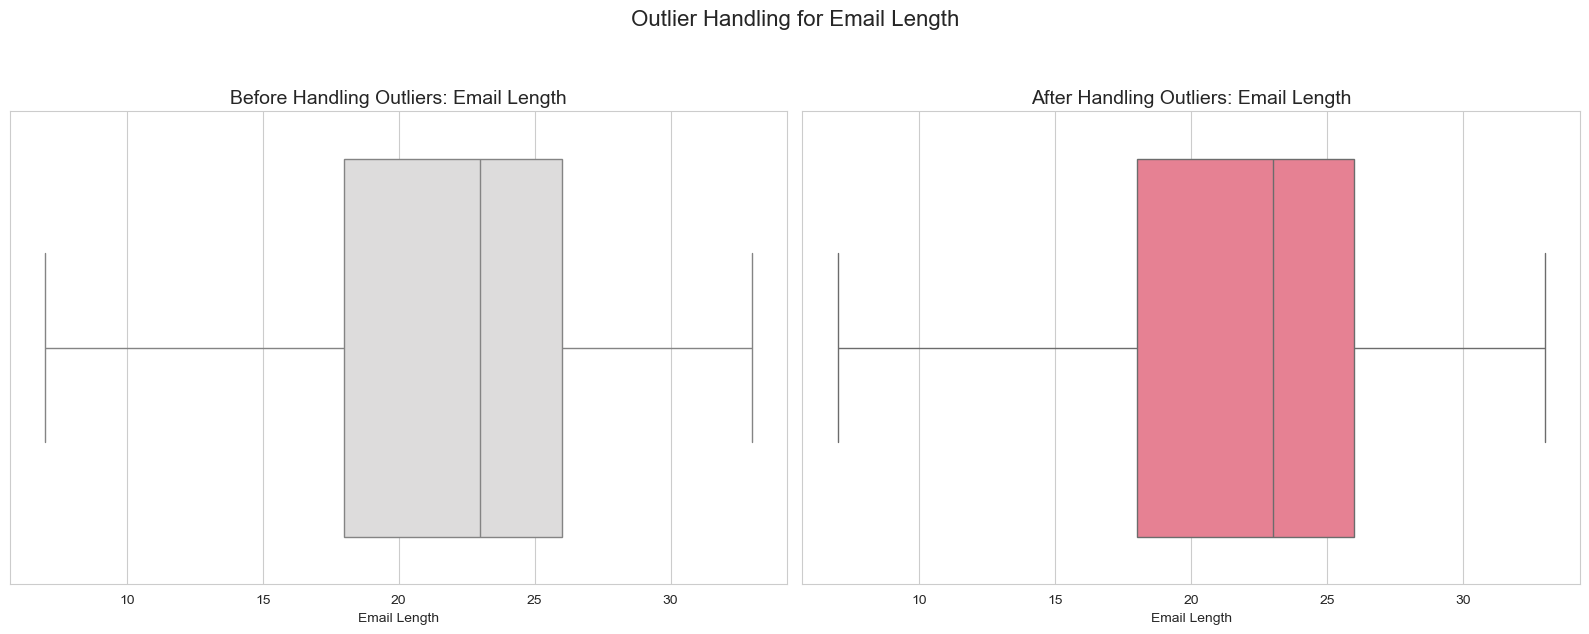

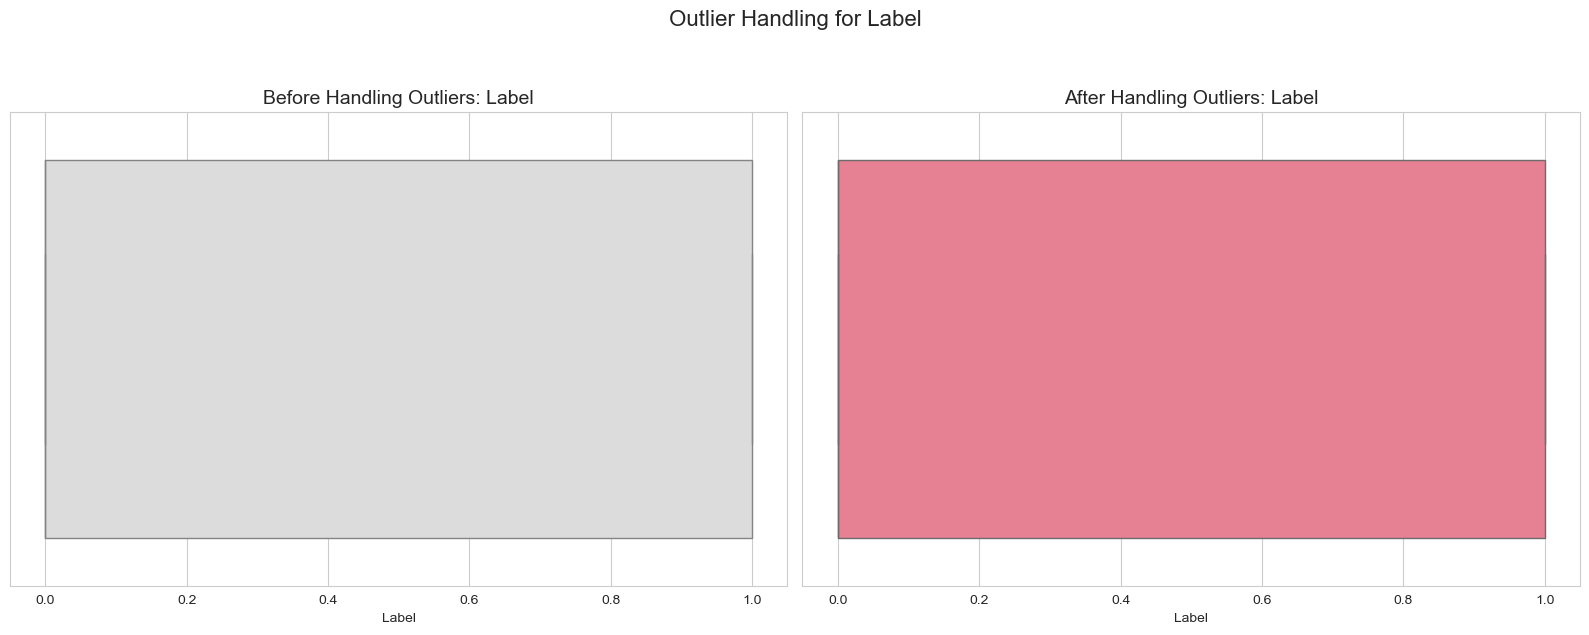

In [92]:
# Check and handle the outlier of all numerical columns
def handle_outliers(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numerical_columns:
        # Detecting outliers using IQR (Interquartile Range)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Plotting boxplot before handling outliers
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        sns.boxplot(x=df[col], ax=axes[0], palette='coolwarm')
        axes[0].set_title(f"Before Handling Outliers: {col}", fontsize=14)
        axes[0].set_xlabel(col)
        
        # Handling outliers by capping them at the bounds
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        
        # Boxplot after handling outliers
        sns.boxplot(x=df[col], ax=axes[1], palette='husl')
        axes[1].set_title(f"After Handling Outliers: {col}", fontsize=14)
        axes[1].set_xlabel(col)
        
        plt.suptitle(f"Outlier Handling for {col}", fontsize=16, y=1.05)
        plt.tight_layout()
        plt.show()

# Calling the function
handle_outliers(df)


# Feature Engineering 

In [94]:
# finding the unique elements in dataset
df.nunique()

Has Attachments             2
Attachment Type             4
URL Count                   4
Has Suspicious Keywords     2
Email Length               27
Label                       2
dtype: int64

In [95]:
# Replacing the attachment type of documents by number
df['Attachment Type']=df['Attachment Type'].replace({'.zip':0, '.exe':1, '.docx':2, '.pdf':3})
df

,Has Attachments,Attachment Type,URL Count,Has Suspicious Keywords,Email Length,Label
0,False,0,2,False,31,1
1,True,1,1,False,28,1
2,False,2,0,True,25,0
3,False,2,3,False,23,0
4,False,3,0,True,23,0
...,...,...,...,...,...,...
995,True,1,1,False,23,0
996,True,0,3,False,21,1
997,True,3,0,True,23,0
998,True,0,2,True,27,0


In [96]:
# encoding the 'Has Attachments' and 'Has Suspicious Keywords' column
def encode_data(df):
    le = LabelEncoder()
    for col in df.select_dtypes(include=['bool', 'category']).columns:
        df[col] = le.fit_transform(df[col])
encode_data(df)
df

,Has Attachments,Attachment Type,URL Count,Has Suspicious Keywords,Email Length,Label
0,0,0,2,0,31,1
1,1,1,1,0,28,1
2,0,2,0,1,25,0
3,0,2,3,0,23,0
4,0,3,0,1,23,0
...,...,...,...,...,...,...
995,1,1,1,0,23,0
996,1,0,3,0,21,1
997,1,3,0,1,23,0
998,1,0,2,1,27,0


# Model Training
#### Assumption - No multicolinearity/ Independance


In [98]:
# Drops the 'Label' column from the DataFrame df, resulting in a new DataFrame df1 that contains only the feature variables (predictors).
df1 = df.drop('Label',axis =1 )
df1

,Has Attachments,Attachment Type,URL Count,Has Suspicious Keywords,Email Length
0,0,0,2,0,31
1,1,1,1,0,28
2,0,2,0,1,25
3,0,2,3,0,23
4,0,3,0,1,23
...,...,...,...,...,...
995,1,1,1,0,23
996,1,0,3,0,21
997,1,3,0,1,23
998,1,0,2,1,27


In [99]:
# organize the list of independent features from df1 into a new DataFrame.
vif_df = pd.DataFrame()

vif_df["Independant Feature"] = df1.columns

vif_df

,Independant Feature
0,Has Attachments
1,Attachment Type
2,URL Count
3,Has Suspicious Keywords
4,Email Length


In [100]:
# Assigns the number of columns in df1 to the variable a.
a = df1.shape[1] #df1.shape[1] retrieves the number of columns (features) in df1, and this value is stored in a.
a

5

In [101]:
# calculates the Variance Inflation Factor (VIF) for each feature in df1 and stores the results in the DataFrame vif_df
vif_list = []

for i in range(a):
    vif = variance_inflation_factor(df1.to_numpy(), i)
    vif_list.append(vif)

vif_df["VIF"] = vif_list

vif_df

,Independant Feature,VIF
0,Has Attachments,1.863532
1,Attachment Type,3.096419
2,URL Count,2.776594
3,Has Suspicious Keywords,1.063114
4,Email Length,4.804591


In [102]:
# Assign the feature set and target variable for model training.
x = df1
y = df["Label"]

In [103]:
# Displays the first 5 rows of the feature set x.
x.head()

,Has Attachments,Attachment Type,URL Count,Has Suspicious Keywords,Email Length
0,0,0,2,0,31
1,1,1,1,0,28
2,0,2,0,1,25
3,0,2,3,0,23
4,0,3,0,1,23


In [104]:
# Displays the first 5 rows of the target variable y.
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Label, dtype: int64

In [105]:
# Calculates and displays the correlation matrix for all numerical features in the DataFrame df.
df.corr()

,Has Attachments,Attachment Type,URL Count,Has Suspicious Keywords,Email Length,Label
Has Attachments,1.000000,0.024278,-0.033182,0.035651,0.016400,0.008191
Attachment Type,0.024278,1.000000,0.052238,0.029181,-0.021671,0.041696
URL Count,-0.033182,0.052238,1.000000,0.011027,0.015472,-0.035366
Has Suspicious Keywords,0.035651,0.029181,0.011027,1.000000,0.063654,-0.227714
Email Length,0.016400,-0.021671,0.015472,0.063654,1.000000,-0.002041
Label,0.008191,0.041696,-0.035366,-0.227714,-0.002041,1.000000


<Axes: >

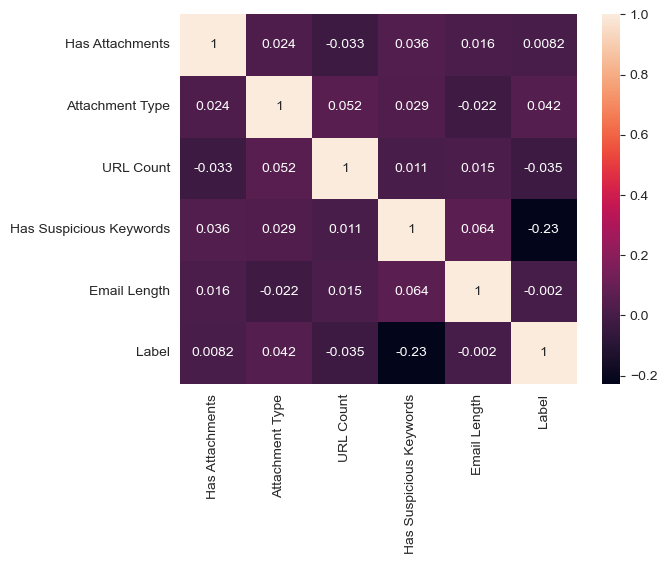

In [106]:
# Heatmap of the correlation matrix for the numerical features in df and annotation the correlation values on the heatmap.
sns.heatmap(df.corr(),annot=True)

In [107]:
# Use pandas' value_counts method to count the occurrences of each unique value in the "Label" column of the dataframe
pd.value_counts(df["Label"])

Label
0    524
1    476
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

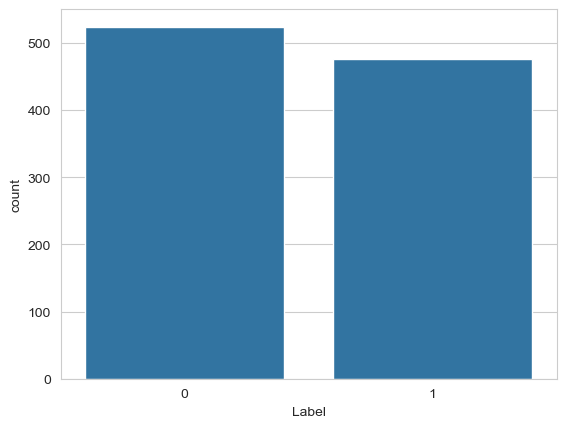

In [108]:
# Create a count plot to visualize the frequency of each category in the "Label" column of the DataFrame
sns.countplot(x=df["Label"])

In [109]:
# Splitting the dataset into training and testing sets for model evaluation
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=10)

# Logistic Regression

In [111]:
# Initialize the logistic regression model

logistic_reg=LogisticRegression()
logistic_reg

LogisticRegression()

In [112]:
# Train the model
logistic_reg_model=logistic_reg.fit(xtrain,ytrain)

In [113]:
# Function Evaluating the model performance using accuracy and classification metrics

def evaluate_model(y_true, y_pred):
    """Evaluates the performance of a classification model."""
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy Score = {accuracy}")
    print("*" * 60)
    
    # Generate confusion matrix
    con_mat = multilabel_confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix : \n{con_mat}")
    print("*" * 60)
    
    # Generate classification report
    clss_report = classification_report(y_true, y_pred)
    print(f"Classification Report : \n{clss_report}")
    print("*" * 60)

## Evalution on training data

In [115]:
# prediction for training dataset

ytrain_pred = logistic_reg_model.predict(xtrain)
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.55625
************************************************************
Confusion Matrix : 
[[[228 158]
  [197 217]]

 [[217 197]
  [158 228]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.58      0.52      0.55       414
           1       0.54      0.59      0.56       386

    accuracy                           0.56       800
   macro avg       0.56      0.56      0.56       800
weighted avg       0.56      0.56      0.56       800

************************************************************


## Evalution on testing data

In [117]:
ytest_pred = logistic_reg_model.predict(xtest)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.555
************************************************************
Confusion Matrix : 
[[[55 35]
  [54 56]]

 [[56 54]
  [35 55]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       110
           1       0.50      0.61      0.55        90

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.57      0.56      0.56       200

************************************************************


# Lasso Regression (L1 Regularization)

In [119]:
lasso = Lasso()
lasso_model = lasso.fit(xtrain, ytrain)
lasso_model

Lasso()

### for training 

In [121]:
ytrain_pred = lasso_model.predict(xtrain)
ytrain_pred = (ytrain_pred >= 0.5).astype(int)
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.5175
************************************************************
Confusion Matrix : 
[[[  0 386]
  [  0 414]]

 [[414   0]
  [386   0]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       414
           1       0.00      0.00      0.00       386

    accuracy                           0.52       800
   macro avg       0.26      0.50      0.34       800
weighted avg       0.27      0.52      0.35       800

************************************************************


### for testing

In [123]:

ytest_pred = lasso_model.predict(xtest)
ytest_pred = (ytest_pred >= 0.5).astype(int)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.55
************************************************************
Confusion Matrix : 
[[[  0  90]
  [  0 110]]

 [[110   0]
  [ 90   0]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       110
           1       0.00      0.00      0.00        90

    accuracy                           0.55       200
   macro avg       0.28      0.50      0.35       200
weighted avg       0.30      0.55      0.39       200

************************************************************


# Ridge Regression (L2 Regularization)

In [125]:
# initialization for ridge
ridge = Ridge()
ridge_model = ridge.fit(xtrain, ytrain)
ridge_model

Ridge()

### for training 

In [127]:

ytrain_pred = ridge_model.predict(xtrain)
ytrain_pred = (ytrain_pred >= 0.5).astype(int)
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.555
************************************************************
Confusion Matrix : 
[[[247 139]
  [217 197]]

 [[197 217]
  [139 247]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.59      0.48      0.53       414
           1       0.53      0.64      0.58       386

    accuracy                           0.56       800
   macro avg       0.56      0.56      0.55       800
weighted avg       0.56      0.56      0.55       800

************************************************************


## for testing

In [129]:

ytest_pred = ridge_model.predict(xtest)
ytest_pred = (ytest_pred >= 0.5).astype(int)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.55
************************************************************
Confusion Matrix : 
[[[58 32]
  [58 52]]

 [[52 58]
  [32 58]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.62      0.47      0.54       110
           1       0.50      0.64      0.56        90

    accuracy                           0.55       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.57      0.55      0.55       200

************************************************************


# Decision Tree

In [131]:
# initialization of Decision tree 
dmodel = DecisionTreeClassifier(max_depth=10, random_state=42)
dmodel.fit(xtrain, ytrain)
dmodel

DecisionTreeClassifier(max_depth=10, random_state=42)

### For training

In [133]:
ytrain_pred = dmodel.predict(xtrain)
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.7475
************************************************************
Confusion Matrix : 
[[[251 135]
  [ 67 347]]

 [[347  67]
  [135 251]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       414
           1       0.79      0.65      0.71       386

    accuracy                           0.75       800
   macro avg       0.75      0.74      0.74       800
weighted avg       0.75      0.75      0.74       800

************************************************************


### For testing

In [135]:
ytest_pred = dmodel.predict(xtest)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.54
************************************************************
Confusion Matrix : 
[[[39 51]
  [41 69]]

 [[69 41]
  [51 39]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       110
           1       0.49      0.43      0.46        90

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.54      0.54      0.54       200

************************************************************


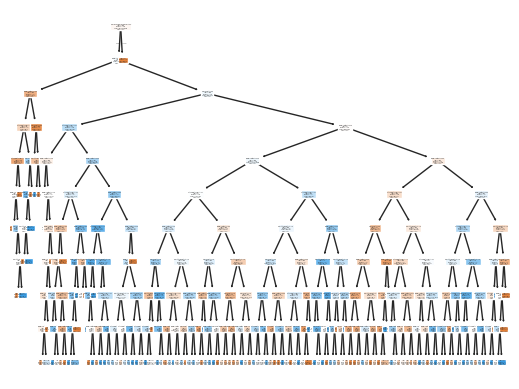

In [136]:
# Creating visualizations to explore data distribution and relationships

plot_tree(dmodel, feature_names=x.columns,class_names=["Yes", "no"], filled=True)
plt.show()

### Decision tree with hyperparameter tunning

In [138]:
# hyperparameters for decision tree
hyperparameters = {"criterion" : ["gini","entropy","log_loss"],  
                  "max_depth" : np.arange(2,11),
                  "min_samples_split" : np.arange(2,11),
                  "min_samples_leaf" : np.arange(2, 12) }

In [139]:
# 
rscv_dt = RandomizedSearchCV(dmodel, hyperparameters, cv=5)
rscv_dt = rscv_dt.fit(xtrain,ytrain)
rscv_dt

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=10,
                                                    random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [140]:
# finding best estimator
rscv_dt.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=9, min_samples_split=8,
                       random_state=42)

In [141]:
# 
rscv_dt = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5, min_samples_split=10,random_state=42)
rscv_dt

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [142]:
# fit training values
rscv_dt_clf_model = rscv_dt.fit(xtrain,ytrain)
rscv_dt_clf_model

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [143]:

# evaluation for training
ytrain_pred = rscv_dt_clf_model.predict(xtrain)
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.635
************************************************************
Confusion Matrix : 
[[[292  94]
  [198 216]]

 [[216 198]
  [ 94 292]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.70      0.52      0.60       414
           1       0.60      0.76      0.67       386

    accuracy                           0.64       800
   macro avg       0.65      0.64      0.63       800
weighted avg       0.65      0.64      0.63       800

************************************************************


In [144]:

# evaluation for training
ytest_pred = rscv_dt_clf_model.predict(xtest)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.54
************************************************************
Confusion Matrix : 
[[[67 23]
  [69 41]]

 [[41 69]
  [23 67]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.64      0.37      0.47       110
           1       0.49      0.74      0.59        90

    accuracy                           0.54       200
   macro avg       0.57      0.56      0.53       200
weighted avg       0.57      0.54      0.53       200

************************************************************


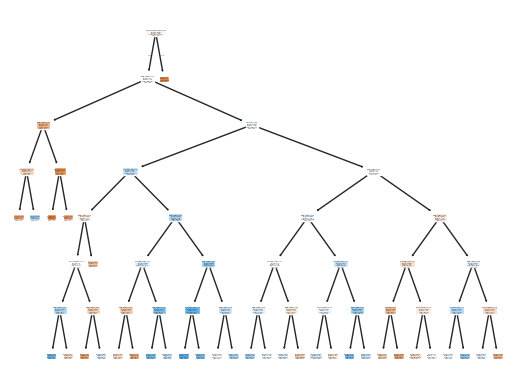

In [145]:
# Creating visualizations to explore data distribution and relationships
plot_tree(rscv_dt_clf_model, feature_names=x.columns, class_names=["Yes", "No"], filled=True)
plt.show()

### Best features by feature importance

In [147]:
# Creating a DataFrame to store feature importance values from the trained Decision Tree model
feature_imporatance_df = pd.DataFrame(rscv_dt_clf_model.feature_importances_)
feature_imporatance_df

,0
0,0.036822
1,0.152802
2,0.065017
3,0.444386
4,0.300973


In [148]:
# Adding a new column to the DataFrame to store feature names from the original dataset
feature_imporatance_df["Features"] = x.columns

In [149]:
# Renaming the first column (indexed as 0) to "Value" for better readability
feature_imporatance_df.rename({0: "Value"}, axis=1, inplace=True)

# Displaying the updated DataFrame with feature importance values
feature_imporatance_df

,Value,Features
0,0.036822,Has Attachments
1,0.152802,Attachment Type
2,0.065017,URL Count
3,0.444386,Has Suspicious Keywords
4,0.300973,Email Length


<Axes: xlabel='Features', ylabel='Value'>

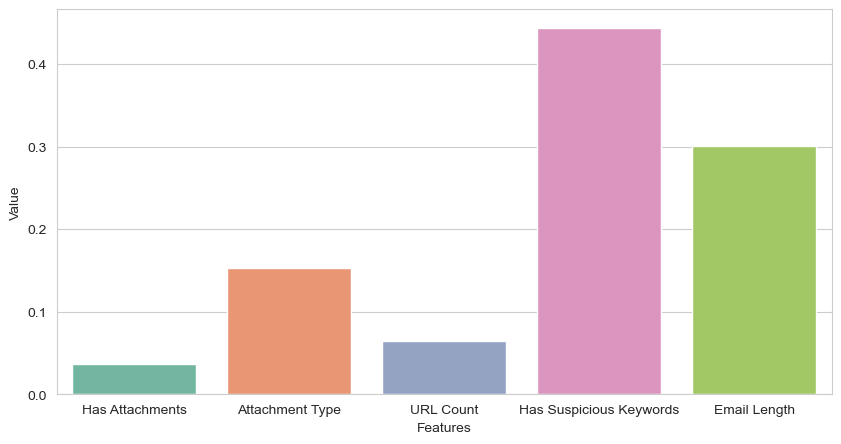

In [150]:
# Setting the figure size for better visualization
plt.figure(figsize=(10,5))

# Creating a bar plot to visualize feature importance values
sns.barplot(x=feature_imporatance_df["Features"], y=feature_imporatance_df["Value"], palette="Set2")

# RandomForest

In [152]:
# Initializing a Random Forest Classifier with 100 trees, a maximum depth of 15, and a fixed random state for reproducibility
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)

# Training the Random Forest model on the training dataset
rf_clf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=15, random_state=42)

## Make predictions

### for training

In [155]:
# Making predictions on the training data using the trained Random Forest model
ytrain_pred = rf_clf.predict(xtrain)

# Evaluating the model's performance on the training data using a custom evaluation function
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.83
************************************************************
Confusion Matrix : 
[[[321  65]
  [ 71 343]]

 [[343  71]
  [ 65 321]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       414
           1       0.82      0.83      0.83       386

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800

************************************************************


### for testing

In [157]:
# Making predictions on the test data using the trained Random Forest model
ytest_pred = rf_clf.predict(xtest)

# Evaluating the model's performance on the test data using a custom evaluation function
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.57
************************************************************
Confusion Matrix : 
[[[53 37]
  [49 61]]

 [[61 49]
  [37 53]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.62      0.55      0.59       110
           1       0.52      0.59      0.55        90

    accuracy                           0.57       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.58      0.57      0.57       200

************************************************************


### Randomforest with hyperparameter tunning

In [159]:
# Defining a hyperparameter grid for tuning the Random Forest model
hyp = {
    "criterion": ["gini", "entropy", "log_loss"],  # Splitting criteria for decision trees
    "max_depth": np.arange(2, 11),  # Range of maximum tree depths to consider
    "min_samples_split": np.arange(2, 11),  # Minimum samples required to split a node
    "min_samples_leaf": np.arange(2, 12),  # Minimum samples required to be a leaf node
    "n_estimators": np.arange(10, 101)  # Number of trees in the forest
}


In [160]:
# Performing hyperparameter tuning using RandomizedSearchCV with 5-fold cross-validation
rscv_rf = RandomizedSearchCV(rf_clf, hyp, cv=5)

# Fitting the RandomizedSearchCV model on the training data to find the best hyperparameters
rscv_rf = rscv_rf.fit(xtrain, ytrain)

# Retrieving the best Random Forest model with optimized hyperparameters
rscv_rf.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=8,
                       n_estimators=22, random_state=42)

In [161]:
# Initializing a Random Forest Classifier with optimized hyperparameters from RandomizedSearchCV
rscv_rf_clf = RandomForestClassifier(
    criterion='entropy', max_depth=2, min_samples_leaf=10, min_samples_split=9, n_estimators=53, random_state=42)  # Setting a fixed random state for reproducibility


# Training the Random Forest model on the training dataset with the optimized hyperparameters
rscv_rf_clf_model = rscv_rf_clf.fit(xtrain, ytrain)

# Displaying the trained Random Forest model
rscv_rf_clf_model


RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10,
                       min_samples_split=9, n_estimators=53, random_state=42)

In [162]:
# Making predictions on the training data using the trained Random Forest model
ytrain_pred = rscv_rf_clf_model.predict(xtrain)

# Evaluating the model's performance on the training data using a custom evaluation function
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.59625
************************************************************
Confusion Matrix : 
[[[259 127]
  [196 218]]

 [[218 196]
  [127 259]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.63      0.53      0.57       414
           1       0.57      0.67      0.62       386

    accuracy                           0.60       800
   macro avg       0.60      0.60      0.60       800
weighted avg       0.60      0.60      0.59       800

************************************************************


In [163]:
# Making predictions on the test data using the trained Random Forest model
ytest_pred = rscv_rf_clf_model.predict(xtest)

# Evaluating the model's performance on the test data using a custom evaluation function
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.545
************************************************************
Confusion Matrix : 
[[[54 36]
  [55 55]]

 [[55 55]
  [36 54]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.60      0.50      0.55       110
           1       0.50      0.60      0.54        90

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.56      0.55      0.55       200

************************************************************


# AdaBoost

In [165]:
# Initialize the AdaBoost Classifier
adaboost_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

In [166]:
# Train the AdaBoost model
adaboost_clf.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=42)

In [167]:
# Making predictions on the training data using the trained AdaBoost model
ytrain_pred = adaboost_clf.predict(xtrain)

# Evaluating the model's performance on the training data using a custom evaluation function
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.61
************************************************************
Confusion Matrix : 
[[[241 145]
  [167 247]]

 [[247 167]
  [145 241]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.63      0.60      0.61       414
           1       0.59      0.62      0.61       386

    accuracy                           0.61       800
   macro avg       0.61      0.61      0.61       800
weighted avg       0.61      0.61      0.61       800

************************************************************


In [168]:
# Predict on the testing set
ytest_pred = adaboost_clf.predict(xtest)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.51
************************************************************
Confusion Matrix : 
[[[47 43]
  [55 55]]

 [[55 55]
  [43 47]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.56      0.50      0.53       110
           1       0.46      0.52      0.49        90

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.52      0.51      0.51       200

************************************************************


### AdaBoost with Hyperparameter Tunning

In [170]:
# Defining a hyperparameter 
hyp = {"n_estimators" : np.arange(2,51), "learning_rate" : [0, 0.1,0.01,0.001,0.25,0.75,1]}

In [171]:
# Performing hyperparameter tuning using RandomizedSearchCV with 5-fold cross-validation for AdaBoost model
rscv_adb_clf = RandomizedSearchCV(adaboost_clf, hyp, cv=5).fit(xtrain, ytrain)

# Retrieving the best AdaBoost model with optimized hyperparameters
rscv_adb_clf.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=23, random_state=42)

In [172]:
# Initializing an AdaBoost Classifier with optimized hyperparameters from RandomizedSearchCV
rscv_adb = AdaBoostClassifier(learning_rate=0.25, n_estimators=18, random_state=42)

# Training the AdaBoost model on the training dataset with the optimized hyperparameters
rscv_adb_model = rscv_adb.fit(xtrain, ytrain)

### for training

In [174]:
# Predict on the training set
ytrain_pred = rscv_adb_model.predict(xtrain)
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.57875
************************************************************
Confusion Matrix : 
[[[298  88]
  [249 165]]

 [[165 249]
  [ 88 298]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.65      0.40      0.49       414
           1       0.54      0.77      0.64       386

    accuracy                           0.58       800
   macro avg       0.60      0.59      0.57       800
weighted avg       0.60      0.58      0.56       800

************************************************************


### for testing

In [176]:
# Predict on the testing set
ytest_pred = rscv_adb_model.predict(xtest)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.55
************************************************************
Confusion Matrix : 
[[[71 19]
  [71 39]]

 [[39 71]
  [19 71]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.67      0.35      0.46       110
           1       0.50      0.79      0.61        90

    accuracy                           0.55       200
   macro avg       0.59      0.57      0.54       200
weighted avg       0.59      0.55      0.53       200

************************************************************


# Gradient Boost

In [178]:
# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

In [179]:
# Train the Gradient model
gb_clf.fit(xtrain, ytrain)

GradientBoostingClassifier(random_state=42)

In [180]:
# Predict on the training set
ytrain_pred = gb_clf.predict(xtrain)
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.67625
************************************************************
Confusion Matrix : 
[[[269 117]
  [142 272]]

 [[272 142]
  [117 269]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       414
           1       0.65      0.70      0.68       386

    accuracy                           0.68       800
   macro avg       0.68      0.68      0.68       800
weighted avg       0.68      0.68      0.68       800

************************************************************


In [181]:
# Predict on the testing set
ytest_pred = gb_clf.predict(xtest)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.515
************************************************************
Confusion Matrix : 
[[[49 41]
  [56 54]]

 [[54 56]
  [41 49]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.57      0.49      0.53       110
           1       0.47      0.54      0.50        90

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.52       200

************************************************************


## Gradient Boost with Hyperparameter

In [183]:
# Defining a hyperparameter 
g_hyp = {"n_estimators" : np.arange(2,51), "learning_rate" : [0, 0.1,0.01,0.001,0.25,0.75,1]}

In [184]:
# Performing hyperparameter tuning using RandomizedSearchCV with 5-fold cross-validation for Gradient Boosting model
rscv_gb_clf = RandomizedSearchCV(gb_clf, g_hyp, cv=5).fit(xtrain, ytrain)

# Retrieving the best Gradient Boosting model with optimized hyperparameters
rscv_gb_clf.best_estimator_


GradientBoostingClassifier(n_estimators=16, random_state=42)

In [185]:
# Initializing a Gradient Boosting Classifier with optimized hyperparameters from RandomizedSearchCV
rscv_gb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=42, random_state=42)

# Training the Gradient Boosting model on the training dataset with the optimized hyperparameters
rscv_gb_model = rscv_gb.fit(xtrain, ytrain)


In [186]:

# Predict on the training set
ytrain_pred = rscv_gb_model.predict(xtrain)
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.55875
************************************************************
Confusion Matrix : 
[[[ 94 292]
  [ 61 353]]

 [[353  61]
  [292  94]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.55      0.85      0.67       414
           1       0.61      0.24      0.35       386

    accuracy                           0.56       800
   macro avg       0.58      0.55      0.51       800
weighted avg       0.58      0.56      0.51       800

************************************************************


In [187]:
# Predict on the testing set
ytest_pred = rscv_gb_model.predict(xtest)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.535
************************************************************
Confusion Matrix : 
[[[23 67]
  [26 84]]

 [[84 26]
  [67 23]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.56      0.76      0.64       110
           1       0.47      0.26      0.33        90

    accuracy                           0.54       200
   macro avg       0.51      0.51      0.49       200
weighted avg       0.52      0.54      0.50       200

************************************************************


# XG Boost

In [189]:
# Installing the XGBoost library, which is commonly used for gradient boosting algorithms
!pip install xgboost

In [190]:
# Initialize XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [191]:
# Train the XG model
xgb_clf.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [192]:
# Predict on the training set
ytrain_pred = xgb_clf.predict(xtrain)
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.80625
************************************************************
Confusion Matrix : 
[[[301  85]
  [ 70 344]]

 [[344  70]
  [ 85 301]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       414
           1       0.81      0.78      0.80       386

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800

************************************************************


In [193]:
# Predict on the testing set
ytest_pred = xgb_clf.predict(xtest)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.55
************************************************************
Confusion Matrix : 
[[[47 43]
  [47 63]]

 [[63 47]
  [43 47]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       110
           1       0.50      0.52      0.51        90

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200

************************************************************


## XG Boost with hyperparameter

In [195]:
# Define hyperparameter space
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': np.linspace(0.01, 0.3, 10)
}

In [196]:
# Perform Randomized Search
rscv_xgb_clf = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [197]:
# Fit RandomizedSearchCV

rscv_xgb_clf.fit(xtrain,ytrain)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=2)

In [198]:
# Predict on the training set
ytrain_pred = rscv_xgb_clf.predict(xtrain)
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.75625
************************************************************
Confusion Matrix : 
[[[281 105]
  [ 90 324]]

 [[324  90]
  [105 281]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       414
           1       0.76      0.73      0.74       386

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800

************************************************************


In [199]:
# Predict on the testing set
ytest_pred = rscv_xgb_clf.predict(xtest)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.53
************************************************************
Confusion Matrix : 
[[[51 39]
  [55 55]]

 [[55 55]
  [39 51]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.59      0.50      0.54       110
           1       0.48      0.57      0.52        90

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.54      0.53      0.53       200

************************************************************


# SVM

In [201]:
# Initialize SVM model with a linear kernel
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)

In [202]:
# Train the model
svm_clf.fit(xtrain, ytrain)

SVC(kernel='linear', random_state=42)

In [203]:
# Predict on the training data
ytrain_pred = svm_clf.predict(xtrain)
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.55
************************************************************
Confusion Matrix : 
[[[191 195]
  [165 249]]

 [[249 165]
  [195 191]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.56      0.60      0.58       414
           1       0.54      0.49      0.51       386

    accuracy                           0.55       800
   macro avg       0.55      0.55      0.55       800
weighted avg       0.55      0.55      0.55       800

************************************************************


In [204]:
# Predict on the testing set
ytest_pred = svm_clf.predict(xtest)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.475
************************************************************
Confusion Matrix : 
[[[40 50]
  [55 55]]

 [[55 55]
  [50 40]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       110
           1       0.42      0.44      0.43        90

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.48      0.47      0.48       200

************************************************************


# K-Nearest Neighbors (KNN)

In [206]:
# Initialize KNN model with K=5
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [207]:
# Train the model
knn_clf.fit(xtrain, ytrain)

KNeighborsClassifier(metric='euclidean')

In [208]:
# Predict on the training data
ytrain_pred = knn_clf.predict(xtrain)
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.7125
************************************************************
Confusion Matrix : 
[[[270 116]
  [114 300]]

 [[300 114]
  [116 270]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       414
           1       0.70      0.70      0.70       386

    accuracy                           0.71       800
   macro avg       0.71      0.71      0.71       800
weighted avg       0.71      0.71      0.71       800

************************************************************


In [209]:
# Predict on the testing set
ytest_pred = knn_clf.predict(xtest)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.55
************************************************************
Confusion Matrix : 
[[[49 41]
  [49 61]]

 [[61 49]
  [41 49]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.60      0.55      0.58       110
           1       0.50      0.54      0.52        90

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200

************************************************************


# Naive Bayes

## Bernoulli Naïve Bayes

In [212]:
# Initialize Bernoulli Naïve Bayes Model
bnb_clf = BernoulliNB()

In [213]:
# Train the model
bnb_clf.fit(xtrain, ytrain)

BernoulliNB()

In [214]:
# Predict on the training data
ytrain_pred = bnb_clf.predict(xtrain)
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.565
************************************************************
Confusion Matrix : 
[[[208 178]
  [170 244]]

 [[244 170]
  [178 208]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.58      0.59      0.58       414
           1       0.55      0.54      0.54       386

    accuracy                           0.56       800
   macro avg       0.56      0.56      0.56       800
weighted avg       0.56      0.56      0.56       800

************************************************************


In [215]:
# Predict on the testing set
ytest_pred = bnb_clf.predict(xtest)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.515
************************************************************
Confusion Matrix : 
[[[51 39]
  [58 52]]

 [[52 58]
  [39 51]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.57      0.47      0.52       110
           1       0.47      0.57      0.51        90

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.52       200

************************************************************


## Multinomial Naïve Bayes

In [217]:
# Initialize Multinomial Naïve Bayes Model
mnb_clf = MultinomialNB()

In [218]:
# Train the model
mnb_clf.fit(xtrain, ytrain)

MultinomialNB()

In [219]:
# Predict on the training data
ytrain_pred = mnb_clf.predict(xtrain)
evaluate_model(ytrain, ytrain_pred)

Accuracy Score = 0.55875
************************************************************
Confusion Matrix : 
[[[259 127]
  [226 188]]

 [[188 226]
  [127 259]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.60      0.45      0.52       414
           1       0.53      0.67      0.59       386

    accuracy                           0.56       800
   macro avg       0.57      0.56      0.56       800
weighted avg       0.57      0.56      0.55       800

************************************************************


In [220]:
# Predict on the testing set
ytest_pred = mnb_clf.predict(xtest)
evaluate_model(ytest, ytest_pred)

Accuracy Score = 0.54
************************************************************
Confusion Matrix : 
[[[63 27]
  [65 45]]

 [[45 65]
  [27 63]]]
************************************************************
Classification Report : 
              precision    recall  f1-score   support

           0       0.62      0.41      0.49       110
           1       0.49      0.70      0.58        90

    accuracy                           0.54       200
   macro avg       0.56      0.55      0.54       200
weighted avg       0.57      0.54      0.53       200

************************************************************


# Find out best model

In [222]:


def compare_models(models, X_train, X_test, y_train, y_test):
    """
    Compares multiple models by calculating accuracy scores on training and testing datasets.
    The function aims for the best trade-off between low bias (high accuracy) and low variance
    (minimal difference between train and test scores).

    Parameters:
        models (dict): Dictionary containing model names as keys and trained model objects as values.
        X_train, X_test: Training and testing feature sets.
        y_train, y_test: Training and testing labels.

    Returns:
        results_df (DataFrame): DataFrame containing accuracy scores and bias-variance gap for all models.
    """

    # Ensure target labels are categorical (integer format)
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # Convert to binary (0 or 1) if values are continuous
    if len(set(y_train)) > 2 or len(set(y_test)) > 2:
        y_train = (y_train > 0.5).astype(int)
        y_test = (y_test > 0.5).astype(int)

    results = []

    for name, model in models.items():
        print(f"Evaluating Model: {name}")

        # Check if model outputs probabilities
        if hasattr(model, "predict_proba"):
            y_train_pred = (model.predict_proba(X_train)[:, 1] > 0.5).astype(int)
            y_test_pred = (model.predict_proba(X_test)[:, 1] > 0.5).astype(int)
        else:
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

        # Convert predictions to integer format
        y_train_pred = y_train_pred.astype(int)
        y_test_pred = y_test_pred.astype(int)

        # Compute Accuracy
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        # Cross-validation to check generalization
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        cv_mean = np.mean(cv_scores)  # Average cross-validation accuracy

        # Compute Bias-Variance Gap (normalized)
        acc_gap = abs(train_acc - test_acc)
        gap_ratio = acc_gap / train_acc  # Normalized gap (smaller is better)

        # Store results
        results.append({
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "CV Accuracy": cv_mean,
            "Bias-Variance Gap": acc_gap,
            "Gap Ratio": gap_ratio
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Sort models by Test Accuracy (high) and Bias-Variance Gap (low)
    results_df = results_df.sort_values(by=["Test Accuracy", "Gap Ratio"], ascending=[False, True])

    # Print results
    print("\nModel Performance Comparison:")
    print(results_df)

    # Identify the best model: Highest test accuracy with the lowest bias-variance gap
    best_model = results_df.iloc[0]
    print(f"\nBest Model Based on Low Bias & Low Variance: {best_model['Model']} "
          f"with Train Accuracy: {best_model['Train Accuracy']:.4f}, "
          f"Test Accuracy: {best_model['Test Accuracy']:.4f}, "
          f"CV Accuracy: {best_model['CV Accuracy']:.4f}, "
          f"Bias-Variance Gap: {best_model['Bias-Variance Gap']:.4f}, "
          f"Gap Ratio: {best_model['Gap Ratio']:.4f}")

    return results_df


In [223]:
# Dictionary of trained models
models = {
    "Logistic Regression": logistic_reg_model,
    "Lasso": lasso_model,
    "Ridge": ridge_model,
    "Decision Tree": dmodel,
    "Decision Tree (Tuned)": rscv_dt_clf_model,
    "Random Forest": rf_clf,
    "Random Forest (Tuned)": rscv_rf_clf_model,
    "AdaBoost": adaboost_clf,
    "AdaBoost (Tuned)": rscv_adb_model,
    "Gradient Boosting": gb_clf,
    "Gradient Boosting (Tuned)": rscv_gb_model,
    "XGBoost": xgb_clf,
    "XGBoost (Tuned)": rscv_xgb_clf,
    "SVM - SVC": svm_clf,
    #"KNN": knn_model,
    "Bernoulli Naive Bayes": bnb_clf,
    "Multinomial Naive Bayes": mnb_clf}

In [224]:
# Compare models
model_comparison_df = compare_models(models, xtrain, xtest, ytrain, ytest)

Evaluating Model: Logistic Regression
Evaluating Model: Lasso
Evaluating Model: Ridge
Evaluating Model: Decision Tree
Evaluating Model: Decision Tree (Tuned)
Evaluating Model: Random Forest
Evaluating Model: Random Forest (Tuned)
Evaluating Model: AdaBoost
Evaluating Model: AdaBoost (Tuned)
Evaluating Model: Gradient Boosting
Evaluating Model: Gradient Boosting (Tuned)
Evaluating Model: XGBoost
Evaluating Model: XGBoost (Tuned)
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Evaluating Model: SVM - SVC
Evaluating Model: Bernoulli Naive Bayes
Evaluating Model: Multinomial Naive Bayes

Model Performance Comparison:
                        Model  Train Accuracy  Test Accuracy  CV Accuracy  \
5               Random Forest         0.

# Save model in pickle file

In [226]:
import pickle

In [227]:
# Saving the trained Logistic Regression model using pickle.
with open("rscv_adb_model.pkl","wb") as f:
    pickle.dump(logistic_reg_model,f)

In [228]:
# Loading the saved model from the "mnb_clf.pkl" file using pickle.
with open("rscv_adb_model.pkl","rb") as f:
    model = pickle.load(f)

# Prediction 

In [230]:
# Checking dataset summary including column data types and missing values
# Code Explanation:
def PredictEmailSecurity(has_attachments, attachment_type, url_count, has_suspicious_keywords, email_length):
    """
    Predict email security status (secure or insecure) based on input features.
    """
    # Prepare the input data as a dictionary
    test_data = {
        "Has Attachments": [has_attachments],
        "Attachment Type": [attachment_type],
        "URL Count": [url_count],
        "Has Suspicious Keywords": [has_suspicious_keywords],
        "Email Length": [email_length]
    }

    # Convert to DataFrame
    test_df = pd.DataFrame(test_data)
    
    # Encode categorical variables (if applicable)
    test_df['Has Attachments'] = test_df['Has Attachments'].replace({True: 1, False: 0})
    test_df['Has Suspicious Keywords'] = test_df['Has Suspicious Keywords'].replace({True: 1, False: 0})
    
    # Encode 'Attachment Type' if it's categorical (assuming encoding is needed)
    attachment_type_mapping = {'pdf': 1, 'exe': 2, 'zip': 3, 'None': 0}  # Update as per your dataset
    test_df['Attachment Type'] = test_df['Attachment Type'].map(attachment_type_mapping).fillna(0)
    
    print("Test Data:")
    print(test_df)
    print(test_df.info())

    # Predict using the trained logistic regression model
    with open("rscv_adb_model.pkl", "rb") as f:
        model = pickle.load(f)

    prediction = model.predict(test_df)[0]
    return f"Email Security Status = {'Secure' if prediction == 1 else 'Insecure'}"

In [231]:
# Processing and analyzing the dataset
# Code Explanation:
result = PredictEmailSecurity(
    has_attachments=True,
    attachment_type='pdf',
    url_count=5,
    has_suspicious_keywords=True,
    email_length=350
)
print(result)

Test Data:
   Has Attachments  Attachment Type  URL Count  Has Suspicious Keywords  \
0                1                1          5                        1   

   Email Length  
0           350  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Has Attachments          1 non-null      int64
 1   Attachment Type          1 non-null      int64
 2   URL Count                1 non-null      int64
 3   Has Suspicious Keywords  1 non-null      int64
 4   Email Length             1 non-null      int64
dtypes: int64(5)
memory usage: 172.0 bytes
None
Email Security Status = Insecure


## Future Scope
1. **Integration with Real-time Email Systems**: Deploying the model to classify emails in real time.
2. **Expanding Feature Set**: Adding more cybersecurity-related features for better classification.
3. **Deep Learning Approaches**: Exploring advanced models like neural networks for improved accuracy.
4. **Continuous Learning**: Implementing an adaptive model that updates based on new threats.
